# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names. (The Lasso regression problem requires you to split the data yourself)
    1. Problem 1 uses datasets 1_1, 1_2 and 1_3. (Classification)
    2. Problem 2 uses datasets 2_1 and 2_2. (Classification)
    3. Problem 3 uses datasets 3_1. (Regression)
    4. Problem 4 uses a small dataset described within the problem itself. (Regression)
    5. Problems 5,6,7,8 uses classification datasets A,B,C,D  (Classification)
    6. Problem 9 uses dataset LassoReg_data (Regression)

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite
import numpy as np
import matplotlib.pyplot as plt
data1 = np.load('dataset1_1.npz')
data2 = np.load('dataset1_2.npz')
data3 = np.load('dataset1_3.npz')
def prob_density_negative(x, mean_negative, covariance):
    """
    Probability density function for X|Y=-1
    """
    mean = x-mean_negative
    matrixmul = np.matmul(mean.T,np.linalg.inv(covariance))
    matrixmul = np.matmul(matrixmul,mean)
    return (np.exp(-0.5*matrixmul)) / (2 * np.pi *np.sqrt(np.linalg.det(covariance)))

def prob_density_positive(x, mean_positive, covariance):
    """
    Probability density function for X|Y=1
    """
    mean = x-mean_positive
    matrixmul = np.matmul(mean.T,np.linalg.inv(covariance))
    matrixmul = np.matmul(matrixmul,mean)
    return (np.exp(-0.5*matrixmul)) / (2 * np.pi *np.sqrt(np.linalg.det(covariance)))

def predict_label(x_matrix, mean_positive, mean_negative, prob_y_pos, prob_y_neg,covar_positive,covar_negative):
    # covariance = np.eye(2)
    likelihood_positive = prob_density_positive(x_matrix, mean_positive, covar_positive)
    likelihood_negative = prob_density_negative(x_matrix, mean_negative, covar_negative)
    
    # Compute posterior probabilities
    posterior_positive = likelihood_positive * prob_y_pos
    posterior_negative = likelihood_negative * prob_y_neg
    
    # Compare posterior probabilities
    return np.where(posterior_positive > posterior_negative, 1, -1)

def Bayes1a(X_train, Y_train, X_test):
    label_positive_datapoints = X_train[Y_train == 1]
    label_negative_datapoints = X_train[Y_train == -1]
    
    mean_positive = np.array([np.mean(label_positive_datapoints[:,0]),np.mean(label_positive_datapoints[:,1])])
    mean_negative = np.array([np.mean(label_negative_datapoints[:,0]),np.mean(label_negative_datapoints[:,1])])

    prob_y_pos = label_positive_datapoints.size/X_train.size
    prob_y_neg = label_negative_datapoints.size/X_train.size
    
    covar = np.eye(2)
    Y_predict_test = []
    for i in range(len(X_test)):
        temp = predict_label(X_test[i], mean_positive, mean_negative, prob_y_pos, prob_y_neg , covar, covar)
        Y_predict_test.append(temp)
        
    return Y_predict_test
    
def Bayes1b(X_train, Y_train, X_test):
    label_positive_datapoints = X_train[Y_train == 1]
    label_negative_datapoints = X_train[Y_train == -1]

    mean_positive = np.array([np.mean(label_positive_datapoints[:,0]),np.mean(label_positive_datapoints[:,1])])
    mean_negative = np.array([np.mean(label_negative_datapoints[:,0]),np.mean(label_negative_datapoints[:,1])])

    prob_y_pos = label_positive_datapoints.size/X_train.size
    prob_y_neg = label_negative_datapoints.size/X_train.size
    
    # print(prob_y_pos, prob_y_neg)
    # covar = np.cov(label_positive_datapoints,rowvar= False)
    covar = np.cov(X_train,rowvar= False)
    
    Y_predict_test = []
    for i in range(len(X_test)):
        temp = predict_label(X_test[i], mean_positive, mean_negative, prob_y_pos, prob_y_neg , covar, covar)
        Y_predict_test.append(temp)
        
    return Y_predict_test

def Bayes1c(X_train, Y_train, X_test):
    label_positive_datapoints = X_train[Y_train == 1]
    label_negative_datapoints = X_train[Y_train == -1]
    
    
    mean_positive = np.array([np.mean(label_positive_datapoints[:,0]),np.mean(label_positive_datapoints[:,1])])
    mean_negative = np.array([np.mean(label_negative_datapoints[:,0]),np.mean(label_negative_datapoints[:,1])])

    prob_y_pos = label_positive_datapoints.size/X_train.size
    prob_y_neg = label_negative_datapoints.size/X_train.size
    
    covar_positive = np.cov(label_positive_datapoints,rowvar= False)
    covar_negative = np.cov(label_negative_datapoints,rowvar= False)
    
    Y_predict_test = []
    for i in range(len(X_test)):
        temp = predict_label(X_test[i], mean_positive, mean_negative, prob_y_pos, prob_y_neg , covar_positive, covar_negative)
        Y_predict_test.append(temp)
        
    return Y_predict_test
    
# Initialize a list to store the results
results = []

# Function to calculate accuracy
def calculate_accuracy(y_test, y_pred):
    count = sum(y_test == y_pred)
    accuracy = count / len(y_test)
    return accuracy

# Loop through datasets and calculate accuracies
for i, data in enumerate([data1, data2, data3]):
    x_train = data['arr_0']
    y_train = data['arr_1']
    x_test = data['arr_2']
    y_test = data['arr_3']

    Y_predict1a = Bayes1a(x_train, y_train, x_test)
    Y_predict1b = Bayes1b(x_train, y_train, x_test)
    Y_predict1c = Bayes1c(x_train, y_train, x_test)

    accuracy1a = calculate_accuracy(y_test, Y_predict1a)
    accuracy1b = calculate_accuracy(y_test, Y_predict1b)
    accuracy1c = calculate_accuracy(y_test, Y_predict1c)

    results.append([f'dataset1_{i+1}', 1-accuracy1a, 1-accuracy1b, 1-accuracy1c])
    
    

# Define the headers for the table
headers = ['Dataset', 'Bayes1a Error', 'Bayes1b Error', 'Bayes1c Error']

# Print the headers
print('{:<17} {:<17} {:<17} {:<17}'.format(*headers))

# Print the results in tabular format
for row in results:
    print('{:<17} {:<17.4f} {:<17.4f} {:<17.4f}'.format(*row))





Dataset           Bayes1a Error     Bayes1b Error     Bayes1c Error    
dataset1_1        0.1260            0.1245            0.1245           
dataset1_2        0.0085            0.0000            0.0000           
dataset1_3        0.4970            0.4950            0.1350           


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


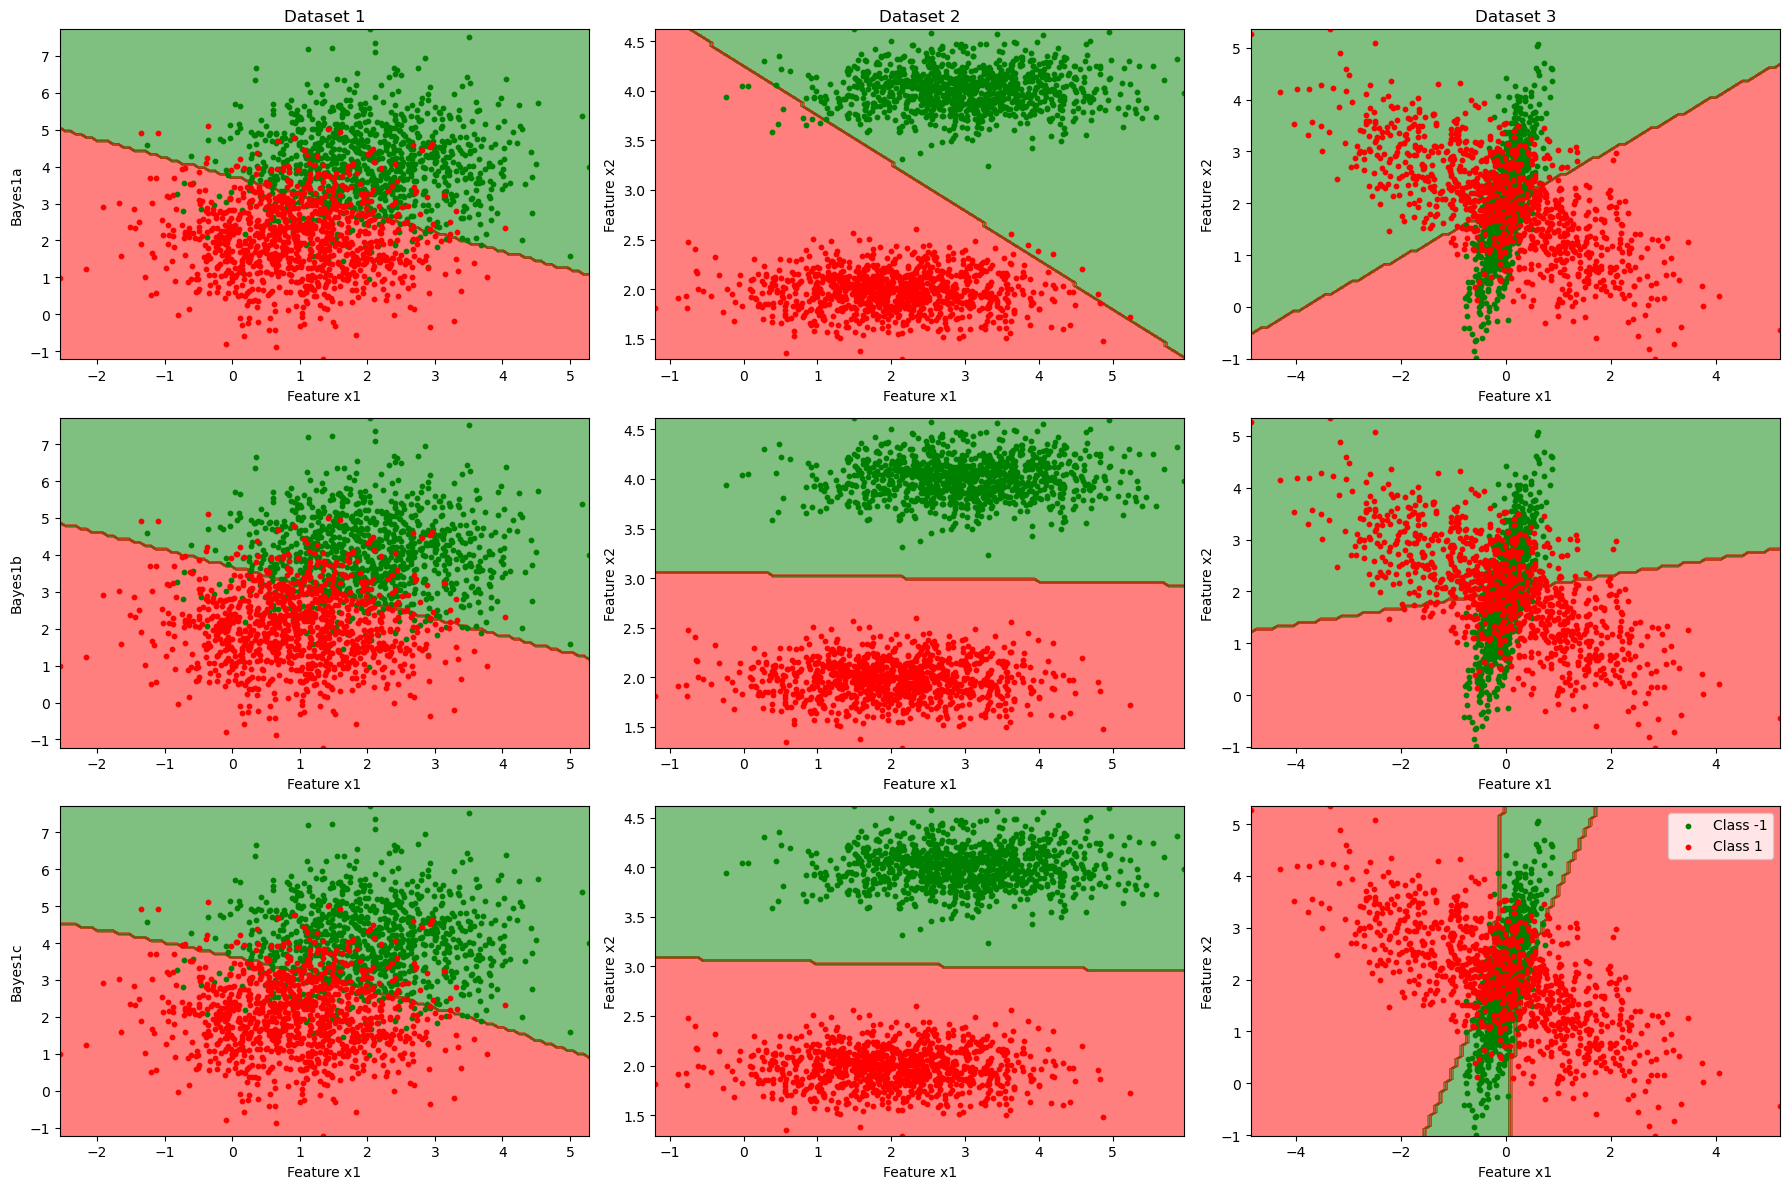

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the classifiers and datasets
classifiers = ["Bayes1a", "Bayes1b", "Bayes1c"]
datasets = ["Dataset 1", "Dataset 2", "Dataset 3"]

fig, axs = plt.subplots(3, 3, figsize=(18, 12))

classifier_funcs = [Bayes1a, Bayes1b, Bayes1c]

for i, classifier_name in enumerate(classifiers):
    for j, dataset_name in enumerate(datasets):
        # Adjust the indices to access the correct dataset variables
        X_train = locals()[f"data{j+1}"]['arr_0']
        Y_train = locals()[f"data{j+1}"]['arr_1']
        X_test = locals()[f"data{j+1}"]['arr_2']
        Y_test = locals()[f"data{j+1}"]['arr_3']

        min_x = np.min(X_test, axis=0)
        max_x = np.max(X_test, axis=0)
        xx, yy = np.meshgrid(np.linspace(min_x[0], max_x[0], 100), np.linspace(min_x[1], max_x[1], 100))

        Z = classifier_funcs[i](X_train, Y_train, np.c_[xx.ravel(), yy.ravel()])
        Z = np.array(Z).reshape(xx.shape)

        axs[i, j].contourf(xx, yy, Z, colors=['green', 'red'], alpha=0.5)

        axs[i, j].scatter(X_test[Y_test == -1, 0], X_test[Y_test == -1, 1], c='green', label='Class -1', s=10)
        axs[i, j].scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], c='red', label='Class 1', s=10)

        axs[i, j].set_xlabel('Feature x1')
        axs[i, j].set_ylabel('Feature x2')

        if i == 0:
            axs[i, j].set_title(dataset_name)
        if j == 0:
            axs[i, j].set_ylabel(classifier_name)

plt.legend()
plt.tight_layout()
plt.show()


<!-- ** Cell type : TextWrite **  -->
(Write your observations and table of errors here)

**Observations :**

Bayes1a assumes equal covariance matrices across all classes, leading to linear decision boundaries that work well for linearly separable data. However, if this assumption is incorrect (such as when data is not linearly separable), this classifier may perform poorly.

Bayes1b, on the other hand, estimates the same covariance based on training data, potentially resulting in quadratic decision boundaries. This approach is advantageous for non-linearly separable data, improving classification accuracy compared to Bayes1a. However, it can overfit when dealing with limited data or when the data distribution is complex.

Bayes1c takes a step further by estimating separate covariance matrices for each class. This allows for more flexible and accurate modeling of data with varying variances among different classes. Consequently, Bayes1c performs well when faced with data that has distinct class distributions and varying covariance structures. Nonetheless, this method requires a larger dataset to avoid overfitting issues.   

          

           
**Loss matrix for the 9 combinations :**

| Classifier/Dataset | Dataset 1_1 | Dataset 2_1 | Dataset 3_1 |
|------------|-----------|-----------|-----------|
| Classifier 1a |    0.1260        |     0.0085       |    0.497       |
| Classifier 2b |     0.1245       |      0.0000      |       0.0000   |
| Classifier 3c |      0.4970     |          0.4950     |       0.135    |

 


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [6]:
import numpy as np
import matplotlib.pyplot as plt

def prob_density_0(x, mean_0, covariance):
    """
    Probability density function for X|Y=0
    """
    mean_diff = x - mean_0
    inv_covariance = np.linalg.inv(covariance)
    matrixmul = np.dot(mean_diff.T, inv_covariance)
    matrixmul = np.dot(matrixmul, mean_diff)
    return (np.exp(-0.5 * matrixmul))

def prob_density_1(x, mean_1, covariance):
    """
    Probability density function for X|Y=1
    """
    mean_diff = x - mean_1
    inv_covariance = np.linalg.inv(covariance)
    matrixmul = np.dot(mean_diff.T, inv_covariance)
    matrixmul = np.dot(matrixmul, mean_diff)
    return (np.exp(-0.5 * matrixmul))

def prob_density_2(x, mean_2, covariance):
    """
    Probability density function for X|Y=2
    """
    mean_diff = x - mean_2
    inv_covariance = np.linalg.inv(covariance)
    matrixmul = np.dot(mean_diff.T, inv_covariance)
    matrixmul = np.dot(matrixmul, mean_diff)
    return (np.exp(-0.5 * matrixmul))

def prob_density_3(x, mean_3, covariance):
    """
    Probability density function for X|Y=3
    """
    mean_diff = x - mean_3
    inv_covariance = np.linalg.inv(covariance)
    matrixmul = np.dot(mean_diff.T, inv_covariance)
    matrixmul = np.dot(matrixmul, mean_diff)
    return (np.exp(-0.5 * matrixmul))

def predict_label(x_matrix, mean_0, mean_1, mean_2, mean_3, prob_y_0, prob_y_1, prob_y_2, prob_y_3, covar_0, covar_1, covar_2, covar_3):
    likelihood_0 = prob_density_0(x_matrix, mean_0, covar_0)
    likelihood_1 = prob_density_1(x_matrix, mean_1, covar_1)
    likelihood_2 = prob_density_2(x_matrix, mean_2, covar_2)
    likelihood_3 = prob_density_3(x_matrix, mean_3, covar_3)
    
    posterior_0 = likelihood_0 * prob_y_0
    posterior_1 = likelihood_1 * prob_y_1
    posterior_2 = likelihood_2 * prob_y_2
    posterior_3 = likelihood_3 * prob_y_3
    
    posterior_probabilities = np.array([posterior_0, posterior_1, posterior_2, posterior_3])
    # print(posterior_probabilities)
    L = np.array([[0, 1, 2, 3],
                  [1, 0, 1, 2],
                  [2, 1, 0, 1],
                  [3, 2, 1, 0]])
    temp = np.dot(posterior_probabilities, L)
    
    predicted_class = np.argmin(temp) + 1
    
    return predicted_class

def Bayes2a(X_train, Y_train, X_test):
    label_0_datapoints = X_train[Y_train == 1]
    label_1_datapoints = X_train[Y_train == 2]
    label_2_datapoints = X_train[Y_train == 3]
    label_3_datapoints = X_train[Y_train == 4]
    
    mean_0 = np.mean(label_0_datapoints, axis=0)
    mean_1 = np.mean(label_1_datapoints, axis=0)
    mean_2 = np.mean(label_2_datapoints, axis=0)
    mean_3 = np.mean(label_3_datapoints, axis=0)
    
    prob_y_0 = label_0_datapoints.shape[0] / X_train.shape[0]
    prob_y_1 = label_1_datapoints.shape[0] / X_train.shape[0]
    prob_y_2 = label_2_datapoints.shape[0] / X_train.shape[0]
    prob_y_3 = label_3_datapoints.shape[0] / X_train.shape[0]
    
    # covar_0 = np.cov(label_0_datapoints, rowvar=False)
    # covar_1 = np.cov(label_1_datapoints, rowvar=False) 
    # covar_2 = np.cov(label_2_datapoints, rowvar=False) 
    # covar_3 = np.cov(label_3_datapoints, rowvar=False)
    
    covar_0 = np.eye(2)
    covar_1 = np.eye(2)
    covar_2 = np.eye(2)
    covar_3 = np.eye(2)
    
    # covar_0 = np.cov(X_train, rowvar=False)
    # covar_1 = np.cov(X_train, rowvar=False) 
    # covar_2 = np.cov(X_train, rowvar=False) 
    # covar_3 = np.cov(X_train, rowvar=False)
    
    Y_predict_test = []
    for i in range(len(X_test)):
        temp = predict_label(X_test[i], mean_0, mean_1, mean_2, mean_3, prob_y_0, prob_y_1, prob_y_2, prob_y_3, covar_0, covar_1, covar_2, covar_3)
        Y_predict_test.append(temp)
        
    return np.array(Y_predict_test)

def Bayes2b(X_train, Y_train, X_test):
    label_0_datapoints = X_train[Y_train == 1]
    label_1_datapoints = X_train[Y_train == 2]
    label_2_datapoints = X_train[Y_train == 3]
    label_3_datapoints = X_train[Y_train == 4]
    
    mean_0 = np.mean(label_0_datapoints, axis=0)
    mean_1 = np.mean(label_1_datapoints, axis=0)
    mean_2 = np.mean(label_2_datapoints, axis=0)
    mean_3 = np.mean(label_3_datapoints, axis=0)
    
    prob_y_0 = label_0_datapoints.shape[0] / X_train.shape[0]
    prob_y_1 = label_1_datapoints.shape[0] / X_train.shape[0]
    prob_y_2 = label_2_datapoints.shape[0] / X_train.shape[0]
    prob_y_3 = label_3_datapoints.shape[0] / X_train.shape[0]
    
    # covar_0 = np.cov(label_0_datapoints, rowvar=False)
    # covar_1 = np.cov(label_1_datapoints, rowvar=False) 
    # covar_2 = np.cov(label_2_datapoints, rowvar=False) 
    # covar_3 = np.cov(label_3_datapoints, rowvar=False)
    
    # covar_0 = np.eye(2)
    # covar_1 = np.eye(2)
    # covar_2 = np.eye(2)
    # covar_3 = np.eye(2)
    
    covar_0 = np.cov(X_train, rowvar=False)
    covar_1 = np.cov(X_train, rowvar=False) 
    covar_2 = np.cov(X_train, rowvar=False) 
    covar_3 = np.cov(X_train, rowvar=False)
    
    Y_predict_test = []
    for i in range(len(X_test)):
        temp = predict_label(X_test[i], mean_0, mean_1, mean_2, mean_3, prob_y_0, prob_y_1, prob_y_2, prob_y_3, covar_0, covar_1, covar_2, covar_3)
        Y_predict_test.append(temp)
        
    return np.array(Y_predict_test)

def Bayes2c(X_train, Y_train, X_test):
    label_0_datapoints = X_train[Y_train == 1]
    label_1_datapoints = X_train[Y_train == 2]
    label_2_datapoints = X_train[Y_train == 3]
    label_3_datapoints = X_train[Y_train == 4]
    
    mean_0 = np.mean(label_0_datapoints, axis=0)
    mean_1 = np.mean(label_1_datapoints, axis=0)
    mean_2 = np.mean(label_2_datapoints, axis=0)
    mean_3 = np.mean(label_3_datapoints, axis=0)
    
    prob_y_0 = label_0_datapoints.shape[0] / X_train.shape[0]
    prob_y_1 = label_1_datapoints.shape[0] / X_train.shape[0]
    prob_y_2 = label_2_datapoints.shape[0] / X_train.shape[0]
    prob_y_3 = label_3_datapoints.shape[0] / X_train.shape[0]
    
    covar_0 = np.cov(label_0_datapoints, rowvar=False)
    covar_1 = np.cov(label_1_datapoints, rowvar=False) 
    covar_2 = np.cov(label_2_datapoints, rowvar=False) 
    covar_3 = np.cov(label_3_datapoints, rowvar=False)
    
    # covar_0 = np.eye(2)
    # covar_1 = np.eye(2)
    # covar_2 = np.eye(2)
    # covar_3 = np.eye(2)
    
    # covar_0 = np.cov(X_train, rowvar=False)
    # covar_1 = np.cov(X_train, rowvar=False) 
    # covar_2 = np.cov(X_train, rowvar=False) 
    # covar_3 = np.cov(X_train, rowvar=False)
    
    Y_predict_test = []
    for i in range(len(X_test)):
        temp = predict_label(X_test[i], mean_0, mean_1, mean_2, mean_3, prob_y_0, prob_y_1, prob_y_2, prob_y_3, covar_0, covar_1, covar_2, covar_3)
        Y_predict_test.append(temp)
        
    return np.array(Y_predict_test)




In [36]:
# Define datasets and their corresponding file names
datasets = [("dataset2_1", 'dataset2_1.npz'), ("dataset2_2", 'dataset2_2.npz')]

# Print header
print("{:<12} {:<15} {:<15} {:<15}".format("Dataset", "Bayes2a Acc.", "Bayes2b Acc.", "Bayes2c Acc."))

# Loop through datasets and calculate accuracies
for dataset_name, file_name in datasets:
    # Load data
    data = np.load(file_name)
    x_train = data['arr_0']
    y_train = data['arr_1']
    x_test = data['arr_2']
    y_test = data['arr_3']
    
    # Calculate accuracies for each classifier
    accuracies = []
    for classifier in [Bayes2a, Bayes2b, Bayes2c]:
        y_pred = classifier(x_train, y_train, x_test)
        accuracy = sum(y_test == y_pred) / len(y_pred)
        accuracies.append(accuracy)
    
    # Print accuracy results for the current dataset
    print("{:<12} {:<15.4f} {:<15.4f} {:<15.4f}".format(dataset_name, *accuracies))


Dataset      Bayes2a Acc.    Bayes2b Acc.    Bayes2c Acc.   
dataset2_1   0.6990          0.6432          0.6997         
dataset2_2   0.8545          0.7498          0.8858         


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


C:\Users\bhati\AppData\Local\Temp\ipykernel_39032\3495601122.py:39: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.jet, marker='x', s=40, edgecolors='k')


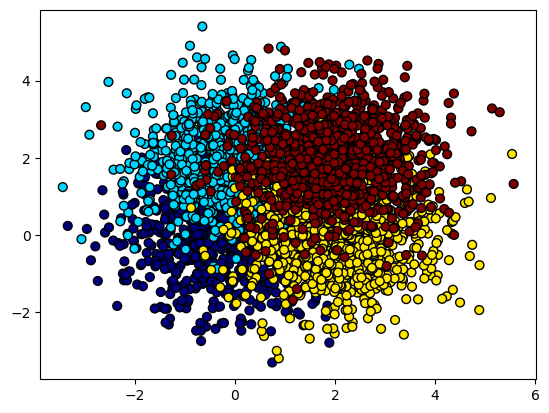

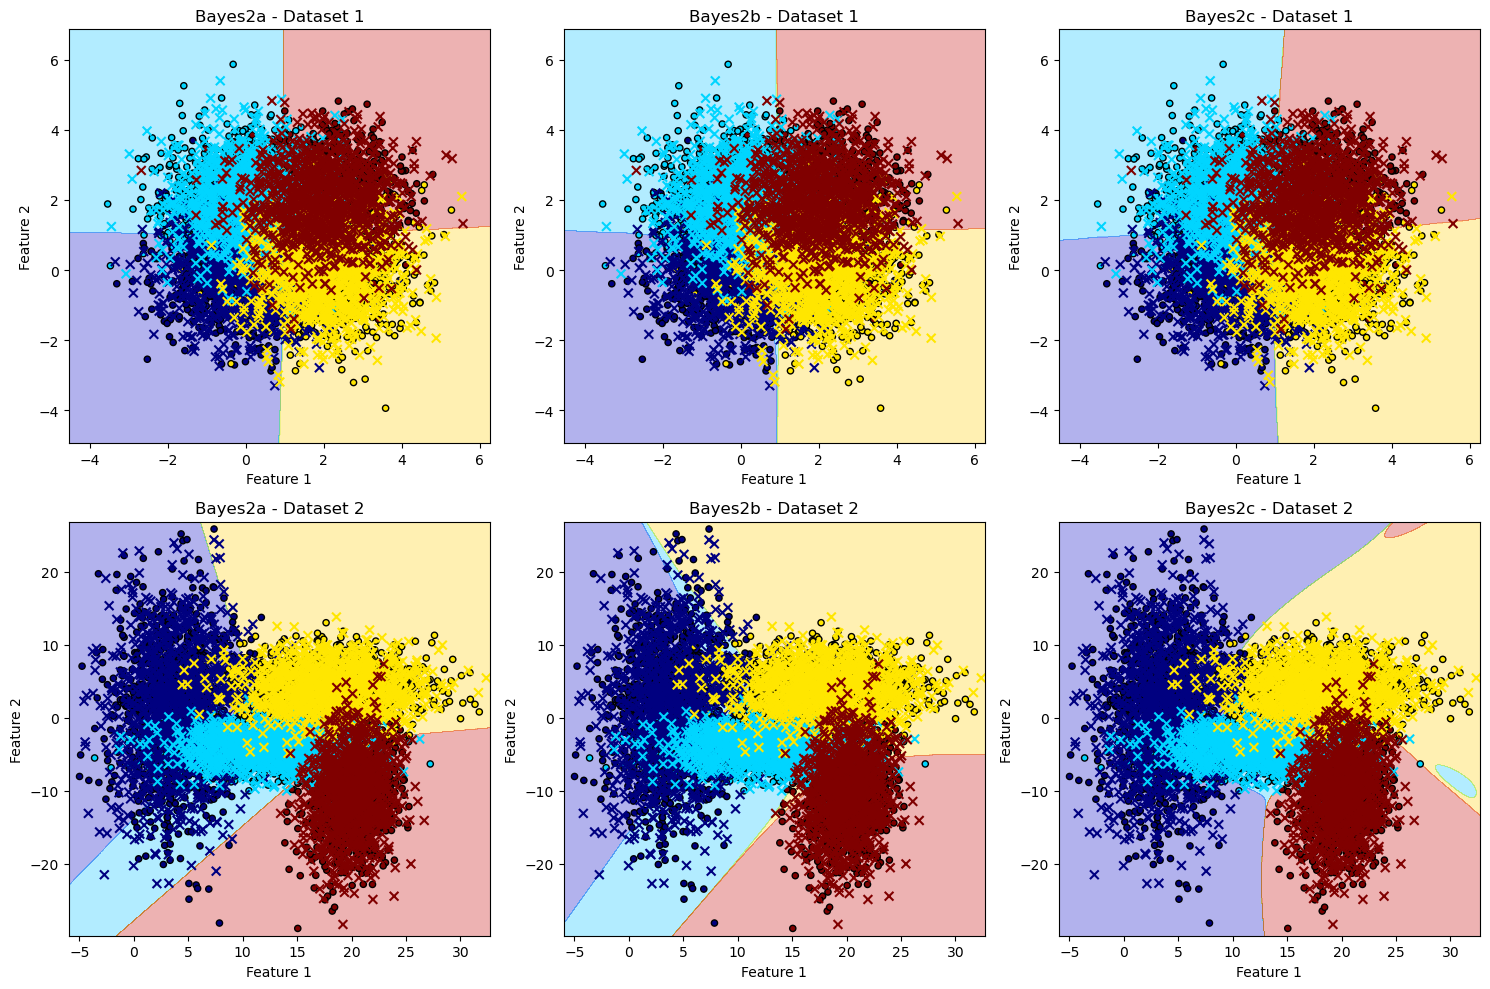

In [41]:
# Cell type: convenience
# Load dataset2
data1a = np.load('dataset2_1.npz')
X_train_1,Y_train_1,X_test_1,Y_test_1 = data1a['arr_0'],data1a['arr_1'],data1a['arr_2'],data1a['arr_3']

data1b = np.load('dataset2_2.npz')
X_train_2,Y_train_2,X_test_2,Y_test_2 = data1b['arr_0'],data1b['arr_1'],data1b['arr_2'],data1b['arr_3']

# fig, ax = plt.subplots()
# scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.jet, marker='o', s=40, edgecolors='k')
fig, ax = plt.subplots()
scatter = ax.scatter(X_test_1[:, 0], X_test_1[:, 1], c=Y_test_1, cmap=plt.cm.jet, marker='o', s=40, edgecolors='k')



def plot_decision_boundary(classifier, X_train, Y_train, X_test, Y_test, title, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    # Generate mesh grid
    h = 0.02  # step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    mesh_grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict class labels
    Z = np.array(classifier(X_train, Y_train, mesh_grid))
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries and regions
    ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=0.3)

    # Plot training data points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.jet, marker='o', s=20, edgecolors='k')

    # Plot test data points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.jet, marker='x', s=40, edgecolors='k')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)


fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot decision boundaries for each classifier on dataset 1
plot_decision_boundary(Bayes2a, X_train_1, Y_train_1, X_test_1, Y_test_1, 'Bayes2a - Dataset 1', ax=axs[0, 0])
axs[0, 0].set_title('Bayes2a - Dataset 1')
plot_decision_boundary(Bayes2b, X_train_1, Y_train_1, X_test_1, Y_test_1, 'Bayes2b - Dataset 1', ax=axs[0, 1])
axs[0, 1].set_title('Bayes2b - Dataset 1')
plot_decision_boundary(Bayes2c, X_train_1, Y_train_1, X_test_1, Y_test_1, 'Bayes2c - Dataset 1', ax=axs[0, 2])
axs[0, 2].set_title('Bayes2c - Dataset 1')

# Plot decision boundaries for each classifier on dataset 2
plot_decision_boundary(Bayes2a, X_train_2, Y_train_2, X_test_2, Y_test_2, 'Bayes2a - Dataset 2', ax=axs[1, 0])
axs[1, 0].set_title('Bayes2a - Dataset 2')
plot_decision_boundary(Bayes2b, X_train_2, Y_train_2, X_test_2, Y_test_2, 'Bayes2b - Dataset 2', ax=axs[1, 1])
axs[1, 1].set_title('Bayes2b - Dataset 2')
plot_decision_boundary(Bayes2c, X_train_2, Y_train_2, X_test_2, Y_test_2, 'Bayes2c - Dataset 2', ax=axs[1, 2])
axs[1, 2].set_title('Bayes2c - Dataset 2')

plt.tight_layout()
plt.show()



In [9]:
def confusion_matrix(y_true, y_pred, num_classes=4):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for i in range(num_classes):
        for j in range(num_classes):
            cm[i, j] = np.sum((y_true == (i+1)) & (y_pred == (j+1)))
    return cm



bayes = [Bayes2a, Bayes2b, Bayes2c]
trainx = [X_train_1, X_train_2]
trainy = [Y_train_1, Y_train_2]
testx = [X_test_1, X_test_2]
testy = [Y_test_1, Y_test_2]

for i in range(2):
    for classifier in bayes:
        pred_y = classifier(trainx[i], trainy[i], testx[i])
        pred_y = np.array(pred_y)
        testy[i] = testy[i].astype(int)
        matrix = confusion_matrix(testy[i], pred_y)
        print(f'Confusion Matrix for {classifier.__name__} on Dataset {i+1}:')
        print(matrix)



Confusion Matrix for Bayes2a on Dataset 1:
[[633 219 136  12]
 [ 97 738  62 103]
 [ 86  49 770  95]
 [ 15 136 194 655]]
Confusion Matrix for Bayes2b on Dataset 1:
[[463 388 145   4]
 [ 43 791 113  53]
 [ 40  95 818  47]
 [  4 149 346 501]]
Confusion Matrix for Bayes2c on Dataset 1:
[[638 216 135  11]
 [ 99 746  58  97]
 [ 89  47 773  91]
 [ 16 141 201 642]]
Confusion Matrix for Bayes2a on Dataset 2:
[[830 150  18   2]
 [ 93 784  46  77]
 [ 30  61 905   4]
 [  0  23  78 899]]
Confusion Matrix for Bayes2b on Dataset 2:
[[675 302  23   0]
 [ 39 749 205   7]
 [  7 118 875   0]
 [  0   3 297 700]]
Confusion Matrix for Bayes2c on Dataset 2:
[[956  32  12   0]
 [144 736  47  73]
 [ 27  29 935   9]
 [  0  32  52 916]]


<!-- ** Cell type : TextWrite **  -->
(Write your observations and table of errors here)

**Error Table for Different Datasets and Bayesian Classifiers**

| Dataset     | Bayes2a Error | Bayes2b Error | Bayes2c Error |
|-------------|------------------|------------------|------------------|
| dataset2_1  | 0.3010           | 0.3568           | 0.3003           |
| dataset2_2  | 0.1455           | 0.2502           | 0.1142           |

This table summarizes the Errors of Bayesian classifiers (Bayes2a, Bayes2b, Bayes2c) on different datasets (dataset2_1, dataset2_2).

**Observations**

1. Changing the loss functions impacts how the classifiers behave, leading to different prediction outcomes compared to the previous scenario.

2. There's a noticeable increase in loss at label 4, resulting in fewer correct classifications for this label in the confusion matrix.

3. When looking at the plots, Bayes 2a establishes linear decision boundaries, while the other classifiers create quadratic decision boundaries.


Confusion Matrix for Bayes2a on Dataset 1:
 
| True/predictied     | 1   | 2   | 3   | 4   |
|-------|-----|-----|-----|-----|
| **1** | 633 | 219 | 136 | 12  |
| **2** | 97  | 738 | 62  | 103 |
| **3** | 86  | 49  | 770 | 95  |
| **4** | 15  | 136 | 194 | 655 |

Confusion Matrix for Bayes2b on Dataset 1:
 
| True/predictied     | 1   | 2   | 3   | 4   |
|-------|-----|-----|-----|-----|
| **1** | 463 | 388 | 145 | 4  |
| **2** | 43  | 791 | 113  | 53 |
| **3** | 40  | 95  | 818 | 47  |
| **4** | 4  | 149 | 346 | 501 |

Confusion Matrix for Bayes2c on Dataset 1:

| True/predictied     | 1   | 2   | 3   | 4   |
|-------|-----|-----|-----|-----|
| **1** | 638 | 216 | 135 | 11  |
| **2** | 99  | 746 | 58  | 97 |
| **3** | 89  | 47  | 773 | 91  |
| **4** | 16  | 141 | 201 | 642 |


Confusion Matrix for Bayes2a on Dataset 2:
 
| True/predictied     | 1   | 2   | 3   | 4   |
|-------|-----|-----|-----|-----|
| **1** | 830 | 150 | 18 | 2  |
| **2** | 93  | 784 | 46  | 77 |
| **3** | 30  | 61  | 905 | 4  |
| **4** | 0  | 23 | 78 | 899 |
 
 Confusion Matrix for Bayes2b on Dataset 2:

| True/predictied     | 1   | 2   | 3   | 4   |
|-------|-----|-----|-----|-----|
| **1** | 675 | 302 | 23 | 0  |
| **2** | 39  | 749 | 205  | 7 |
| **3** | 7  | 118  | 875 | 2  |
| **4** | 0  | 3 | 297 | 700 |

Confusion Matrix for Bayes2c on Dataset 2:

| True/predictied     | 1   | 2   | 3   | 4   |
|-------|-----|-----|-----|-----|
| **1** | 956 | 32 | 12 | 0  |
| **2** | 144  | 736 | 47  | 73 |
| **3** | 27  | 29  | 935 | 9  |
| **4** | 0  | 32 | 52 | 916 |


**Cell type : TextRead**


# Problem 3 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset3_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




In [10]:
import numpy as np

def featureMap(X, degree):
    XinHD = []
    # max_features = (degree + 1) * (degree + 2) // 2  # Maximum number of features for given degree
    for d in range(X.shape[0]):
        temp = []
        for i in range(degree + 1):
            for j in range(degree + 1):
                if (i + j <= degree):
                    temp.append((X[d, 0]**i) * (X[d, 1]**j))
        # Pad the feature vector with zeros if needed
        # while len(temp) < max_features:
        #     temp.append(0)
        XinHD.append(temp)
    return np.array(XinHD)

def compute_weight_vector(X, Y, lamba, degree):    
    M = X.shape[1]  # Number of features
    XinHDMatrix = featureMap(X, degree)
    # print(XinHDMatrix)
    # Compute Q^T * Q
    QtQ = XinHDMatrix.T.dot(XinHDMatrix)
    # Add regularization term
    QtQ_reg = QtQ + lamba * np.eye(QtQ.shape[0])
    # Compute inverse of (Q^T * Q + lambda * I)
    QtQ_reg_inv = np.linalg.inv(QtQ_reg)
    # Compute Q^T * Y
    QtY = XinHDMatrix.T.dot(Y)
    # Compute w_star
    w_star = QtQ_reg_inv.dot(QtY)
    return w_star

def compute_MSE(x_test, y_test, degree, w_star):
    XTestinHDMatrix = featureMap(x_test, degree)
    y_predict = np.dot(w_star, XTestinHDMatrix.T)
    # print(y_predict.shape, y_test.shape)
    # print(y_predict)
    y_diff = y_test - y_predict
    ans = 0
    for i in range(len(y_diff)):
        ans += y_diff[i]**2
    return ans / y_diff.shape

# Importing numpy
import numpy as np

# Define the featureMap, compute_weight_vector, compute_MSE functions here

# Load data
data = np.load('dataset3_1.npz')
x_train, y_train, x_test, y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

# Define lambda values, degrees, and sets
lambda_vals = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]
degrees = [1, 2, 4, 8, 16]
sets = [50, 100, 200, 1000]

# Initialize arrays to store MSE values
mse_train = {}
mse_test = {}
for set_size in sets:
    mse_train[set_size] = np.zeros((len(degrees), len(lambda_vals)))
    mse_test[set_size] = np.zeros((len(degrees), len(lambda_vals)))

# Calculate MSE values for different set sizes, degrees, and lambda values
for set_size in sets:
    for degree_idx, degree in enumerate(degrees):
        for lambda_idx, lambd in enumerate(lambda_vals):
            w_star = compute_weight_vector(x_train[:set_size], y_train[:set_size], lambd, degree)
            mse_train[set_size][degree_idx, lambda_idx] = compute_MSE(x_train[:set_size], y_train[:set_size], degree, w_star)
            mse_test[set_size][degree_idx, lambda_idx] = compute_MSE(x_test, y_test, degree, w_star)

# Print the table
def print_mse_table(mse_values, set_size):
    print(f'MSE Train for {set_size} set Datapoints')
    print(' ' * 13, end='')
    for lambd in lambda_vals:
        print(f'{lambd:<10}', end='')
    print()
    for i, degree in enumerate(degrees):
        print(f'Degree {degree:<5}', end='')
        for j, lambd in enumerate(lambda_vals):
            print(f'{mse_values[set_size][i, j]:<10.4f}', end='')
        print()

for set_size in sets:
    print_mse_table(mse_train, set_size)
    print()
    print_mse_table(mse_test, set_size)
    print()


MSE Train for 50 set Datapoints
             1e-09     1e-07     1e-05     0.001     0.1       10.0      
Degree 1    0.2504    0.2504    0.2504    0.2504    0.2504    0.2559    
Degree 2    0.1341    0.1341    0.1341    0.1341    0.1342    0.1975    
Degree 4    0.1020    0.1020    0.1020    0.1020    0.1041    0.1806    
Degree 8    0.0001    0.0002    0.0108    0.0417    0.0820    0.1632    
Degree 16   0.0000    0.0000    0.0013    0.0311    0.0700    0.1500    

MSE Train for 50 set Datapoints
             1e-09     1e-07     1e-05     0.001     0.1       10.0      
Degree 1    0.3013    0.3013    0.3013    0.3013    0.3008    0.2784    
Degree 2    0.1579    0.1579    0.1579    0.1579    0.1567    0.2082    
Degree 4    0.1573    0.1573    0.1573    0.1572    0.1618    0.1966    
Degree 8    237.6901  172.5019  18.5943   0.9903    0.1652    0.1939    
Degree 16   250.4661  232.0261  66.6977   2.3373    0.2040    0.1961    

MSE Train for 100 set Datapoints
             1e-09     

In [11]:
best_params = {}

for set_size in sets:
    min_mse_test = np.min(mse_test[set_size])
    min_idx = np.where(mse_test[set_size] == min_mse_test)
    best_degree = degrees[min_idx[0][0]]
    best_lambda = lambda_vals[min_idx[1][0]]
    best_params[set_size] = {'Degree': best_degree, 'Lambda': best_lambda, 'MSE': min_mse_test}

# Print the best parameters
print("Best Parameters:")
for set_size, params in best_params.items():
    print(f"For {set_size} set Datapoints - Degree: {params['Degree']}, Lambda: {params['Lambda']}, Test MSE: {params['MSE']}")


Best Parameters:
For 50 set Datapoints - Degree: 2, Lambda: 0.1, Test MSE: 0.15673525917060394
For 100 set Datapoints - Degree: 4, Lambda: 1e-09, Test MSE: 0.14277575186837768
For 200 set Datapoints - Degree: 16, Lambda: 1e-09, Test MSE: 0.03714994762831734
For 1000 set Datapoints - Degree: 16, Lambda: 1e-09, Test MSE: 0.00119772248346568


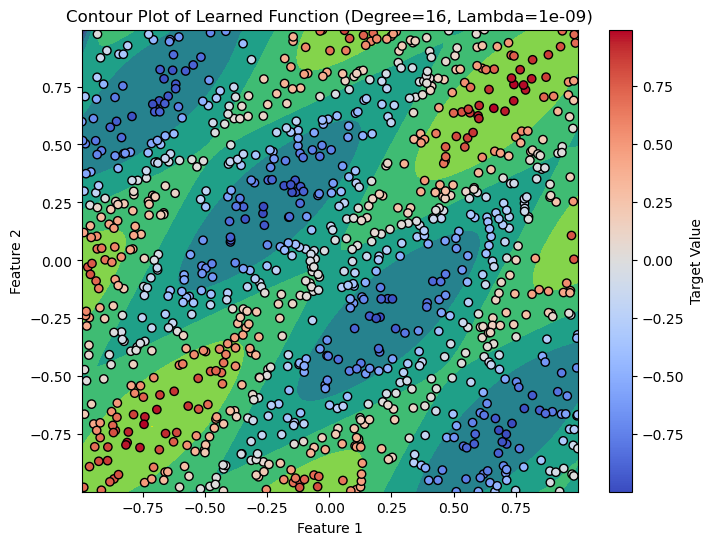

In [12]:
import matplotlib.pyplot as plt

# Choose the best hyperparameters based on the test MSE
chosen_params = best_params[1000]
degree_chosen = chosen_params['Degree']
lambda_chosen = chosen_params['Lambda']

# Compute weight vector for chosen hyperparameters
w_star_chosen = compute_weight_vector(x_train[:1000], y_train[:1000], lambda_chosen, degree_chosen)

# Define a grid of points for the contour plot
x1_vals = np.linspace(np.min(x_train[:, 0]), np.max(x_train[:, 0]), 100)
x2_vals = np.linspace(np.min(x_train[:, 1]), np.max(x_train[:, 1]), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)
X_contour = np.vstack((x1_mesh.flatten(), x2_mesh.flatten())).T
X_contour_HD = featureMap(X_contour, degree_chosen)

# Compute predictions for the contour plot
y_contour = np.dot(w_star_chosen, X_contour_HD.T)

# Plot the contour plot
plt.figure(figsize=(8, 6))
plt.contourf(x1_mesh, x2_mesh, y_contour.reshape(x1_mesh.shape), cmap='viridis')
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title(f'Contour Plot of Learned Function (Degree={degree_chosen}, Lambda={lambda_chosen})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Target Value')
plt.show()


<!-- ** Cell type : TextWrite ** -->
|                 | 1e-09 | 1e-07 | 1e-05 |  0.001 |  0.1  |  10.0  |
|-----------------|-------|-------|-------|--------|-------|--------|
| **MSE Train (50)**  |       |       |       |        |       |        |
| Degree 1        | 0.2504| 0.2504| 0.2504| 0.2504 | 0.2504| 0.2559 |
| Degree 2        | 0.1341| 0.1341| 0.1341| 0.1341 | 0.1342| 0.1975 |
| Degree 4        | 0.1020| 0.1020| 0.1020| 0.1020 | 0.1041| 0.1806 |
| Degree 8        | 0.0001| 0.0002| 0.0108| 0.0417 | 0.0820| 0.1632 |
| Degree 16       | 0.0000| 0.0000| 0.0013| 0.0311 | 0.0700| 0.1500 |
| **MSE Test (50)**   |       |       |       |        |       |        |
| Degree 1        | 0.3013| 0.3013| 0.3013| 0.3013 | 0.3008| 0.2784 |
| Degree 2        | 0.1579| 0.1579| 0.1579| 0.1579 | 0.1567| 0.2082 |
| Degree 4        | 0.1573| 0.1573| 0.1573| 0.1572 | 0.1618| 0.1966 |
| Degree 8        |237.6901|172.5019| 18.5943| 0.9903 | 0.1652| 0.1939 |
| Degree 16       |250.4661|232.0261| 66.6977| 2.3373 | 0.2040| 0.1961 |
| **MSE Train (100)** |       |       |       |        |       |        |
| Degree 1        | 0.2581| 0.2581| 0.2581| 0.2581 | 0.2581| 0.2587 |
| Degree 2        | 0.1310| 0.1310| 0.1310| 0.1310 | 0.1310| 0.1650 |
| Degree 4        | 0.1130| 0.1130| 0.1130| 0.1130 | 0.1137| 0.1524 |
| Degree 8        | 0.0416| 0.0416| 0.0417| 0.0580 | 0.0929| 0.1449 |
| Degree 16       | 0.0000| 0.0005| 0.0075| 0.0417 | 0.0837| 0.1395 |
| **MSE Test (100)**  |       |       |       |        |       |        |
| Degree 1        | 0.2731| 0.2731| 0.2731| 0.2731 | 0.2731| 0.2686 |
| Degree 2        | 0.1532| 0.1532| 0.1532| 0.1532 | 0.1529| 0.1757 |
| Degree 4        | 0.1428| 0.1428| 0.1428| 0.1428 | 0.1460| 0.1690 |
| Degree 8        | 0.7129| 0.7113| 0.5808| 0.2036 | 0.1626| 0.1712 |
| Degree 16       | 54.0816|11.7704|23.4166| 0.4178 | 0.1884| 0.1742 |
| **MSE Train (200)** |       |       |       |        |       |        |
| Degree 1        | 0.2465| 0.2465| 0.2465| 0.2465 | 0.2465| 0.2466 |
| Degree 2        | 0.1337| 0.1337| 0.1337| 0.1337 | 0.1337| 0.1475 |
| Degree 4        | 0.1133| 0.1133| 0.1133| 0.1133 | 0.1136| 0.1444 |
| Degree 8        | 0.0617| 0.0617| 0.0617| 0.0639 | 0.0957| 0.1412 |
| Degree 16       | 0.0000| 0.0011| 0.0113| 0.0445 | 0.0835| 0.1338 |
| **MSE Test (200)**  |       |       |       |        |       |        |
| Degree 1        | 0.2677| 0.2677| 0.2677| 0.2677 | 0.2676| 0.2662 |
| Degree 2        | 0.1458| 0.1458| 0.1458| 0.1458 | 0.1458| 0.1587 |
| Degree 4        | 0.1312| 0.1312| 0.1312| 0.1312 | 0.1308| 0.1571 |
| Degree 8        | 0.1374| 0.1374| 0.1370| 0.1182 | 0.1140| 0.1565 |
| Degree 16       | 0.0371| 0.0837| 0.1708| 0.0869 | 0.1112| 0.1522 |
| **MSE Train (1000)**|       |       |       |        |       |        |
| Degree 1        | 0.2407| 0.2407| 0.2407| 0.2407 | 0.2407| 0.2407 |
| Degree 2        | 0.1388| 0.1388| 0.1388| 0.1388 | 0.1388| 0.1397 |
| Degree 4        | 0.1250| 0.1250| 0.1250| 0.1250 | 0.1250| 0.1342 |
| Degree 8        | 0.0767| 0.0767| 0.0767| 0.0768 | 0.0948| 0.1284 |
| Degree 16       | 0.0000| 0.0004| 0.0065| 0.0384 | 0.0850| 0.1217 |
| **MSE Test (1000)** |       |       |       |        |       |        |
| Degree 1        | 0.2625| 0.2625| 0.2625| 0.2625 | 0.2625| 0.2625 |
| Degree 2        | 0.1424| 0.1424| 0.1424| 0.1424 | 0.1424| 0.1445 |
| Degree 4        | 0.1271| 0.1271| 0.1271| 0.1271 | 0.1272| 0.1409 |
| Degree 8        | 0.0848| 0.0848| 0.0848| 0.0839 | 0.0978| 0.1350 |
| Degree 16       | 0.0012| 0.0015| 0.0110| 0.0497 | 0.0907| 0.1278 |

Analyzing the data presented, which includes Mean Squared Error (MSE) values for different degrees of feature mapping (Degree 1, Degree 2, Degree 4, Degree 8, and Degree 16) and different regularization parameters (Lambda values), we can observe the effects of overfitting and underfitting in regression models.

1. **Overfitting:**
   - Overfitting occurs when a model learns the training data too well, capturing noise and random fluctuations that do not generalize well to new, unseen data.
   - In the provided data, we can see signs of overfitting in higher-degree polynomial models (Degree 8 and Degree 16) with smaller Lambda values (1e-09, 1e-07, 1e-05, 0.001). These models achieve very low MSE values on the training data (MSE Train), indicating a good fit to the training set.
   - However, when we look at the MSE values on the test data (MSE Test), especially for Degree 8 and Degree 16 models with small Lambda values, we notice a significant increase in the error compared to the training set. This increase suggests that these models are too complex and have captured noise from the training data, leading to poor performance on unseen data.

2. **Underfitting:**
   - Underfitting occurs when a model is too simple to capture the underlying patterns in the data, resulting in high bias and high error rates on both the training and test sets.
   - In the provided data, we can observe underfitting in Degree 1 models with larger Lambda values (10.0). These models exhibit relatively high MSE values on both the training and test data, indicating that they are not capturing enough complexity from the data.
   - Additionally, Degree 2 models with larger Lambda values also show signs of underfitting, although to a lesser extent compared to Degree 1 models with large Lambdas.

3. **Optimal Model Selection:**
   - To mitigate overfitting, it's crucial to choose a model complexity (degree of feature mapping) and regularization parameter (Lambda) that strike a balance between bias and variance.
   - In this context, models with moderate complexity (e.g., Degree 4) and appropriate Lambda values (e.g., 0.1) tend to generalize well to unseen data, as indicated by lower MSE values on the test set compared to more complex models (Degree 8 and Degree 16 with small Lambdas) and simpler models (Degree 1 and Degree 2 with large Lambdas).

In summary, the data highlights the trade-off between model complexity, regularization, and generalization performance. It underscores the importance of choosing an optimal model that avoids both underfitting and overfitting to achieve robust predictive capabilities on new data.
<!-- ** Cell type : TextWrite ** -->

**Cell type : TextRead**


# Problem 4 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell. e.g. what happens when tau, sigma and number of data points are increased.

Hint 1: In class we saw the expression for posterior of W, but only used it to find the MAP estimate. But it can be analysed in greater detail. You may read up classic textbooks like Bishop to figure out the posterior or work it out yourself. This is not too hard.

Hint 2: In particular, observe that the posterior looks like a product of exponential functions, and the term inside the exponent is always a degree 2 (or less) function of w. Can you think of any distribution which looks like that?











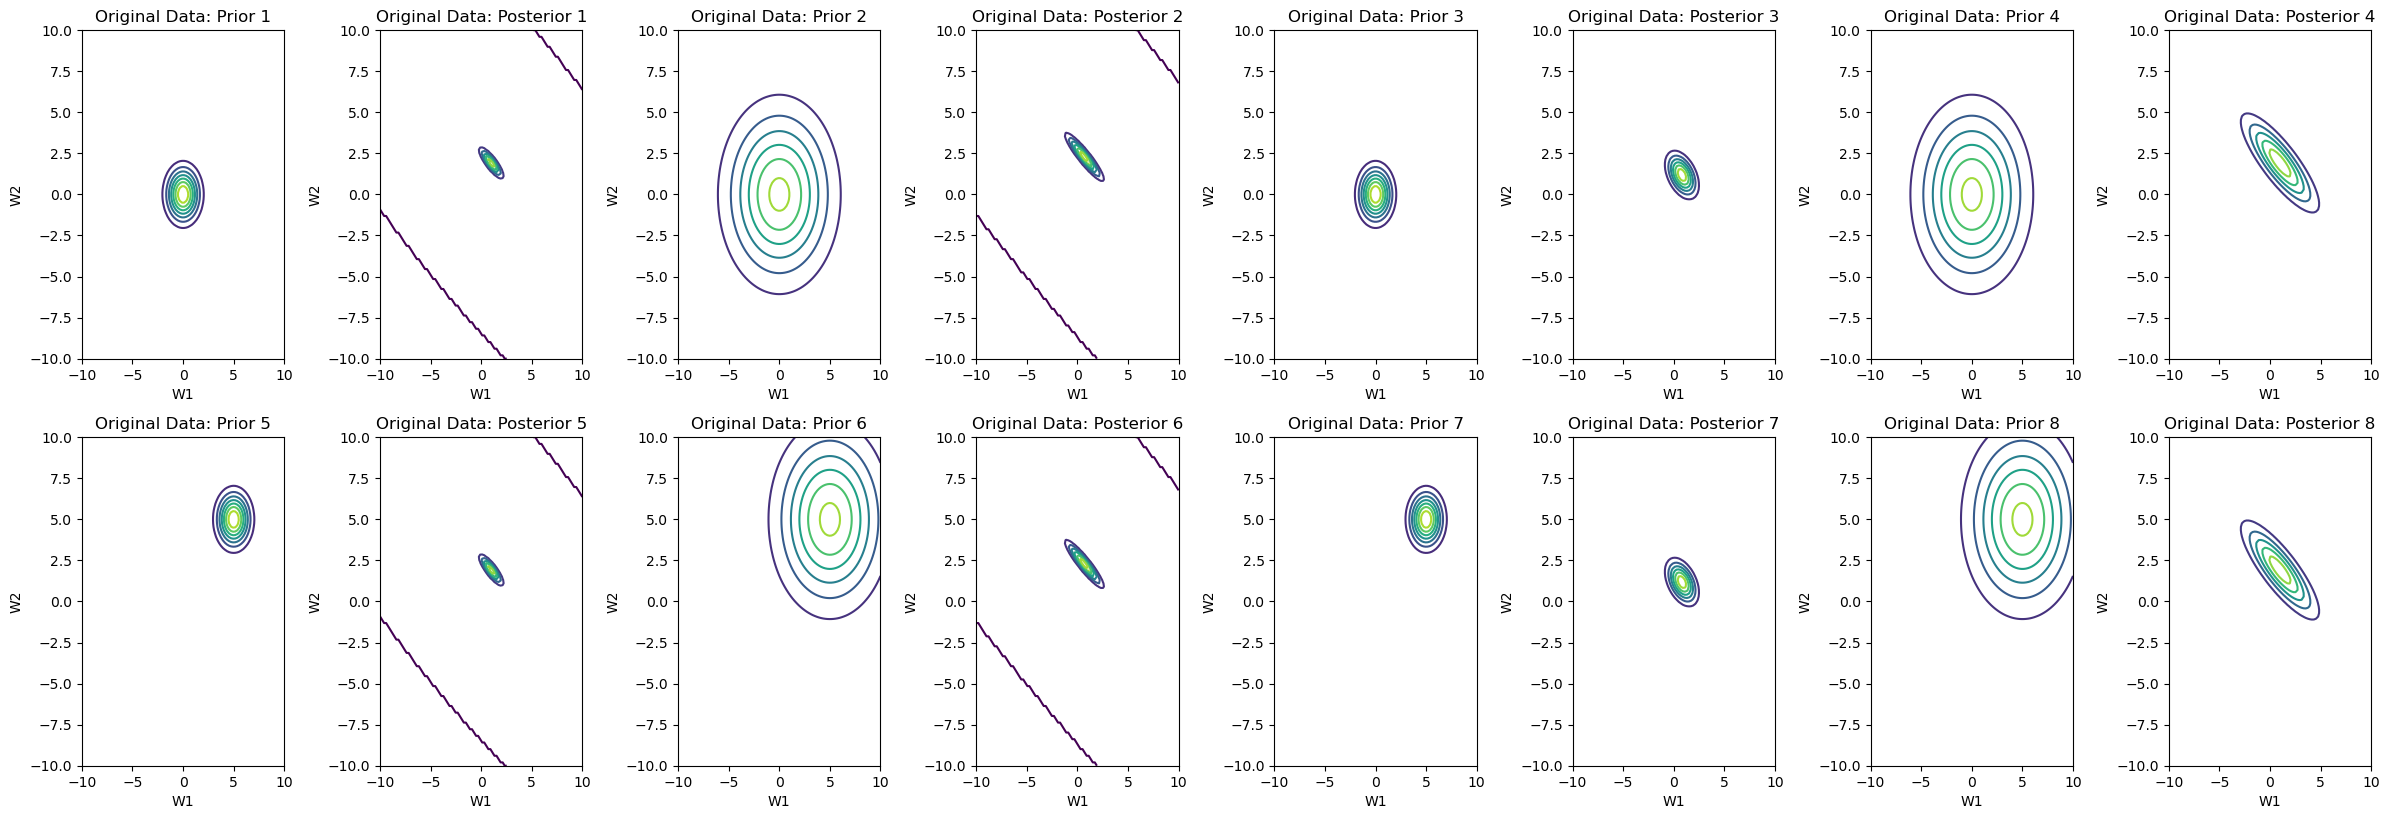

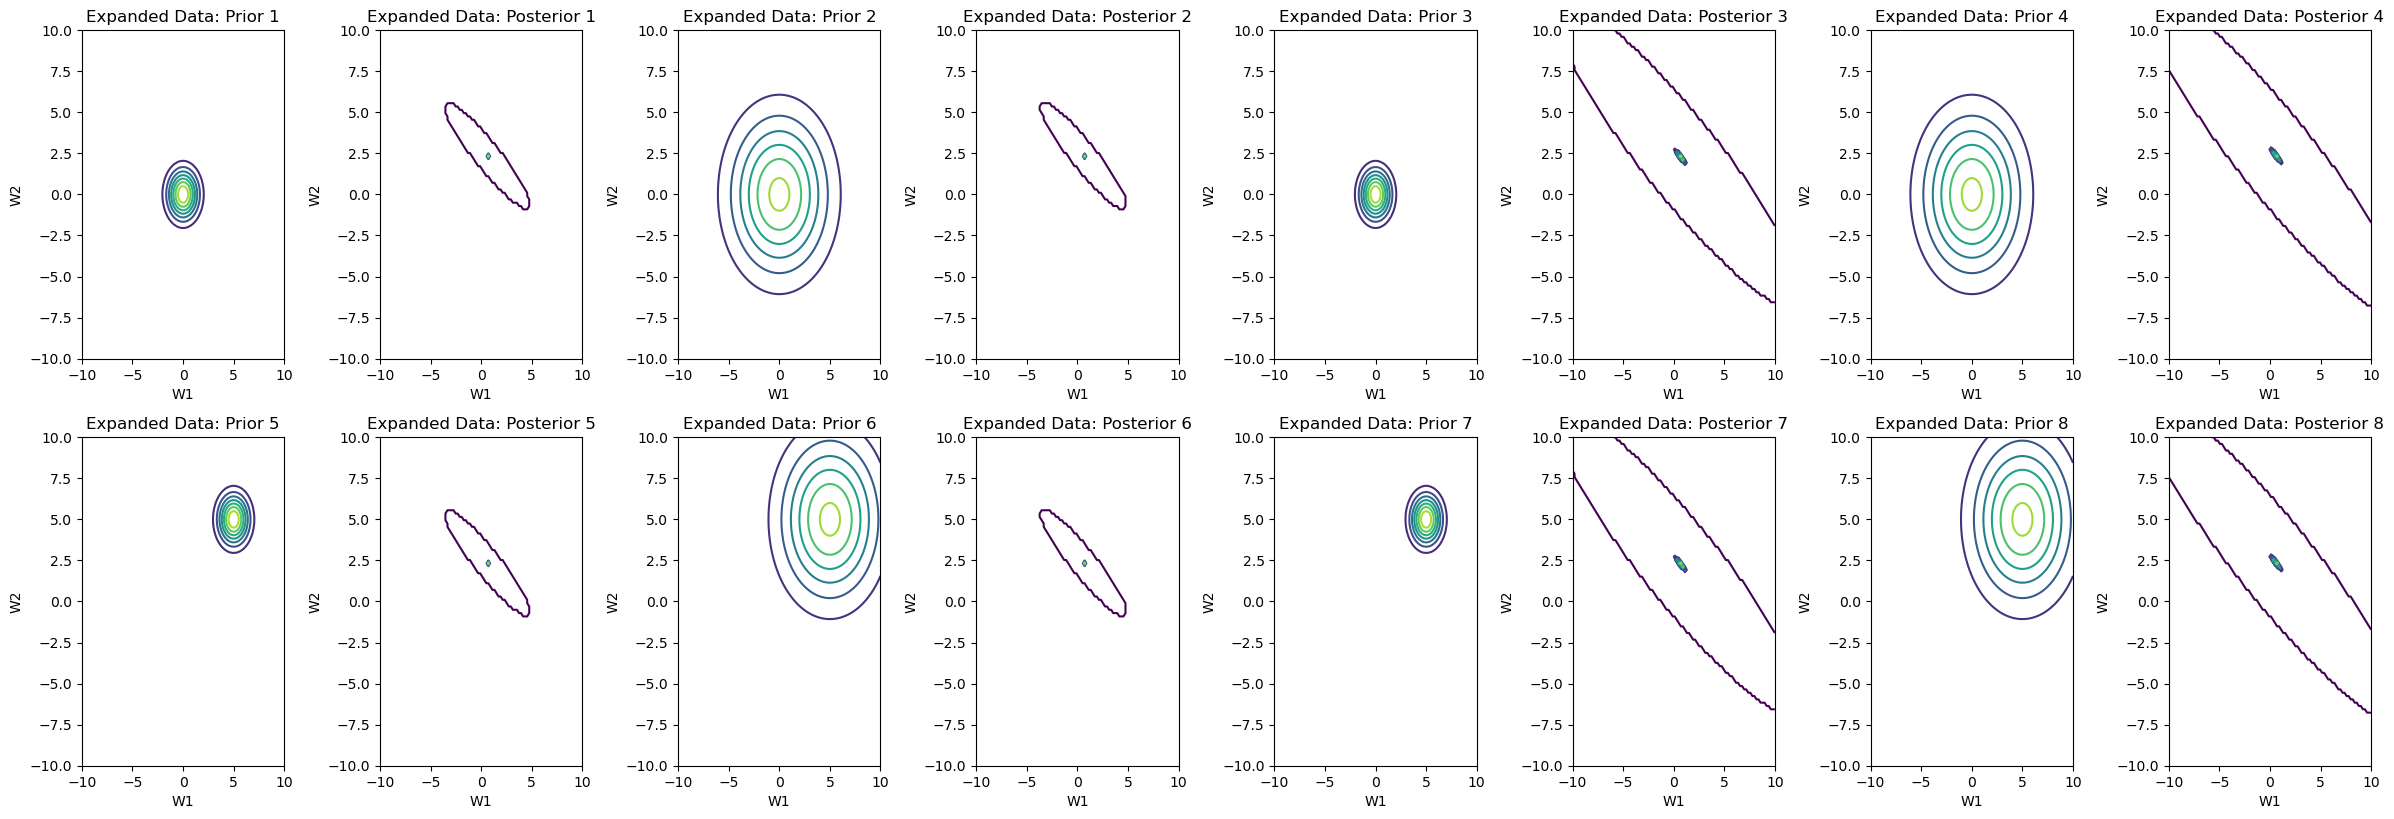

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data points and their corresponding Y values
X = np.array([[1.0, 2.0], [2.0, 2.1], [0.6, 1.5], [1.1, 0.9]])
Y = np.array([5.1, 6.1, 4.2, 2.9])

# Define the settings for mu, tau^2, and sigma^2
settings = [
    {"mu": np.array([0, 0]), "tau_sq": 1, "sigma_sq": 1},
    {"mu": np.array([0, 0]), "tau_sq": 10, "sigma_sq": 1},
    {"mu": np.array([0, 0]), "tau_sq": 1, "sigma_sq": 10},
    {"mu": np.array([0, 0]), "tau_sq": 10, "sigma_sq": 10},
    {"mu": np.array([5, 5]), "tau_sq": 1, "sigma_sq": 1},
    {"mu": np.array([5, 5]), "tau_sq": 10, "sigma_sq": 1},
    {"mu": np.array([5, 5]), "tau_sq": 1, "sigma_sq": 10},
    {"mu": np.array([5, 5]), "tau_sq": 10, "sigma_sq": 10}
]

# Define a function to compute posterior parameters
def compute_posterior_params(X, Y, mu, tau_sq, sigma_sq):
    sigma_sq_inv = 1 / sigma_sq
    X_T_X = np.dot(X.T, X)
    posterior_cov = np.linalg.inv(np.eye(2) / tau_sq + sigma_sq_inv * X_T_X)
    posterior_mean = np.dot(posterior_cov, sigma_sq_inv * np.dot(X.T, Y))
    return posterior_mean, posterior_cov

# Define a function to plot contours for given settings and data
def plot_contours(X, Y, settings, title_prefix):
    plt.figure(figsize=(24, 16))

    for i, setting in enumerate(settings):
        mu = setting["mu"]
        tau_sq = setting["tau_sq"]
        sigma_sq = setting["sigma_sq"]

        posterior_mean, posterior_cov = compute_posterior_params(X, Y, mu, tau_sq, sigma_sq)

        w1_vals = np.linspace(-10, 10, 100)
        w2_vals = np.linspace(-10, 10, 100)
        w1_grid, w2_grid = np.meshgrid(w1_vals, w2_vals)
        w_grid = np.dstack((w1_grid, w2_grid))

        prior_pdf = np.exp(-0.5 * np.sum((w_grid - mu.reshape(1, 1, -1)) @ np.linalg.inv(np.eye(2) * tau_sq) * (w_grid - mu.reshape(1, 1, -1)), axis=-1))
        prior_pdf /= (2 * np.pi * tau_sq) ** 0.5

        posterior_pdf = np.exp(-0.5 * np.sum((w_grid - posterior_mean.reshape(1, 1, -1)) @ np.linalg.inv(posterior_cov) * (w_grid - posterior_mean.reshape(1, 1, -1)), axis=-1))
        posterior_pdf /= np.sqrt(np.linalg.det(2 * np.pi * posterior_cov))

        plt.subplot(4, 8, i * 2 + 1)
        plt.contour(w1_grid, w2_grid, prior_pdf, cmap='viridis')
        plt.title(f'{title_prefix} Prior {i+1}')
        plt.xlabel('W1')
        plt.ylabel('W2')

        plt.subplot(4, 8, i * 2 + 2)
        plt.contour(w1_grid, w2_grid, posterior_pdf, cmap='viridis')
        plt.title(f'{title_prefix} Posterior {i+1}')
        plt.xlabel('W1')
        plt.ylabel('W2')

    plt.tight_layout()
    plt.show()

# Plot contours for the original dataset
plot_contours(X, Y, settings, "Original Data:")

# Expand the dataset with 400 data points
X_expanded = np.tile(X, (100, 1))
Y_expanded = np.tile(Y, 100)

# Plot contours for the expanded dataset
plot_contours(X_expanded, Y_expanded, settings, "Expanded Data:")


<!-- ** Cell type : TextWrite ** -->
**Observations -**

1. Initially, the Gaussian-shaped prior distribution is centered around the mean value, showing symmetry.
2. Circular contours imply that both dimensions have equal variance.
3. The posterior distribution changes based on observed data.
4. Contours of the updated distribution narrow and move towards areas with higher likelihood of observed data.
5. Elliptical contours in the posterior are due to both prior influence and data noise.
6. Shifting the mean only adjusts the plot to align with the new mean values.
7. The elliptical form of the posterior distribution results from the correlation between parameters W1 and W2. In Bayesian regression, the likelihood of observed data and the prior distribution of parameters influence the shape of the posterior. Correlated parameters lead to an elliptical distribution.

**Cell type : TextRead**

# 5. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [15]:
dataset_A = np.load('dataset_A.npz')
dataset_B = np.load('dataset_B.npz')
dataset_C = np.load('dataset_C.npz')
dataset_D = np.load('dataset_D.npz')

# Extract arrays from datasets
xa_train = dataset_A['arr_0']
ya_train = dataset_A['arr_1']
xa_test = dataset_A['arr_2']
ya_test = dataset_A['arr_3']

xb_train = dataset_B['arr_0']
yb_train = dataset_B['arr_1']
xb_test = dataset_B['arr_2']
yb_test = dataset_B['arr_3']

xc_train = dataset_C['arr_0']
yc_train = dataset_C['arr_1']
xc_test = dataset_C['arr_2']
yc_test = dataset_C['arr_3']

xd_train = dataset_D['arr_0']
yd_train = dataset_D['arr_1']
xd_test = dataset_D['arr_2']
yd_test = dataset_D['arr_3']


import numpy as np

def feature_mapping(X, degree):
    XinHD = []
    for d in range(X.shape[0]):
        temp = []
        for i in range(int(degree) + 1):
            for j in range(int(degree) + 1):
                if (i + j <= int(degree)):
                    temp.append((X[d, 0]**i) * (X[d, 1]**j))
        
        XinHD.append(temp)
    return np.array(XinHD)

def polynomial_kernel(X, X2, degree):
    X_poly = feature_mapping(X, degree)
    X_poly2 = feature_mapping(X2, degree)
    X_final = np.array(X_poly)
    X_final2 = np.array(X_poly2)
    return np.matmul(X_final, X_final2.T)

def gaussian_kernel(X, X2, gamma):
    pairwise_distances_sq = np.sum((X[:, np.newaxis] - X2[np.newaxis, :]) ** 2, axis=-1)
    return np.exp(-gamma * pairwise_distances_sq)

def linear_kernel(X, X2):
    return np.matmul(X, X2.T)

def kernel_function(kernel, X, X2, param):
    if kernel == 'linear':
        return linear_kernel(X, X2)
    elif kernel == 'gaussian':
        return gaussian_kernel(X, X2, param)
    elif kernel == 'polynomial':
        return polynomial_kernel(X, X2, param)

def sigmoid(x):
    clipped_x = np.clip(x, -500, 500)
    return 1 / (np.exp(-clipped_x) + 1)

def gradient(alpha, K, lambda_val, Y):
    sumation = 0
    for i in range(K.shape[0]):
        term = np.matmul(-1. * Y[i], np.matmul(alpha.T, K[:, i]))
        sum = sigmoid(term) * (-1. * Y[i] * K[:, i])
        sumation += sum
    cons = lambda_val * (np.dot(K, alpha))
    sumation = np.reshape(sumation, (len(sumation), 1))
    return sumation + cons

def train_logistic_regression(X, Y, kernel='linear', reg_param=0., kernel_param=1., num_iter_gd=100):
    Y = np.reshape(Y, (len(Y), 1))
    eta = 0.001
    K = kernel_function(kernel, X, X, kernel_param)
    n = int(K.shape[0])
    alpha = np.random.rand(n, 1)
    for i in range(num_iter_gd):
        alpha = alpha - eta * (gradient(alpha, K, reg_param, Y))
    return alpha

def predict(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    K = kernel_function(kernel, train_X, test_X, kernel_param)
    pred_y = []
    for t in range(len(test_X)):
        sumation = sum(alpha[i] * K[i, t] for i in range(len(train_Y)))
        expo = sigmoid(sumation)
        pred_y.append(1.0 if expo - 0.5 >= 0 else -1.0)
    return np.array(pred_y)

def accuracy_score(true_labels, predicted_labels):
    return sum(1 for true_label, pred_label in zip(true_labels, predicted_labels) if true_label == pred_label) / len(true_labels)






In [16]:
def find_best_hyperparameters(X_train, Y_train, X_val, Y_val, kernels, kernel_params, reg_params, num_iter_gd):
    best_accuracy = 0
    best_hyperparameters = None
    
    for kernel_param in kernel_params:
        for reg_param in reg_params:
            for kernel in kernels:
                alpha = train_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param, num_iter_gd)
                predicted_labels = predict(alpha, X_train, Y_train, X_val, kernel, kernel_param)
                accuracy_val = accuracy_score(Y_val, predicted_labels)
                
                if best_accuracy < accuracy_val:
                    best_accuracy = accuracy_val
                    best_hyperparameters = {'kernel': kernel, 'kernel_param': kernel_param, 'reg_param': reg_param}
    
    return best_hyperparameters, best_accuracy

kernels = ['linear', 'gaussian', 'polynomial']
kernel_params = [1., 2., 3.]  # Adjust these values as needed
reg_params = [0.1, 0.01, 0.001]  # Adjust these values as needed
num_iter_gd = 5  # Number of gradient descent iterations

# Perform hyperparameter tuning and get the best hyperparameters and corresponding accuracies
best_hyperparameters_A, best_accuracy_A = find_best_hyperparameters(xa_train, ya_train, xa_test, ya_test, kernels, kernel_params, reg_params, num_iter_gd)
best_hyperparameters_B, best_accuracy_B = find_best_hyperparameters(xb_train, yb_train, xb_test, yb_test, kernels, kernel_params, reg_params, num_iter_gd)
best_hyperparameters_C, best_accuracy_C = find_best_hyperparameters(xc_train, yc_train, xc_test, yc_test, kernels, kernel_params, reg_params, num_iter_gd)
best_hyperparameters_D, best_accuracy_D = find_best_hyperparameters(xd_train, yd_train, xd_test, yd_test, kernels, kernel_params, reg_params, num_iter_gd)


<!-- TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  
 -->
 **Dataset A - Best Hyperparameters:**
- Kernel: Gaussian
- Kernel Parameter: 3.0
- Regularization Parameter: 0.1

**Dataset A - Train Zero-One Error:** 0.054
**Dataset A - Test Zero-One Error:** 0.048

---

**Dataset B - Best Hyperparameters:**
- Kernel: Linear
- Kernel Parameter: 1.0
- Regularization Parameter: 0.1

**Dataset B - Train Zero-One Error:** 0.174
**Dataset B - Test Zero-One Error:** 0.202

---

**Dataset C - Best Hyperparameters:**
- Kernel: Linear
- Kernel Parameter: 1.0
- Regularization Parameter: 0.1

**Dataset C - Train Zero-One Error:** 0.497
**Dataset C - Test Zero-One Error:** 0.488

---

**Dataset D - Best Hyperparameters:**
- Kernel: Gaussian
- Kernel Parameter: 1.0
- Regularization Parameter: 0.1

**Dataset D - Train Zero-One Error:** 0.433
**Dataset D - Test Zero-One Error:** 0.231




In [17]:
alpha_A = train_logistic_regression(xa_train, ya_train, best_hyperparameters_A['kernel'], best_hyperparameters_A['reg_param'], best_hyperparameters_A['kernel_param'], num_iter_gd)
alpha_B = train_logistic_regression(xb_train, yb_train, best_hyperparameters_B['kernel'], best_hyperparameters_B['reg_param'], best_hyperparameters_B['kernel_param'], num_iter_gd)
alpha_C = train_logistic_regression(xc_train, yc_train, best_hyperparameters_C['kernel'], best_hyperparameters_C['reg_param'], best_hyperparameters_C['kernel_param'], num_iter_gd)
alpha_D = train_logistic_regression(xd_train, yd_train, best_hyperparameters_D['kernel'], best_hyperparameters_D['reg_param'], best_hyperparameters_D['kernel_param'], num_iter_gd)

# Calculate zero-one errors for training and testing sets using the best hyperparameters for each dataset
train_pred_A = predict(alpha_A, xa_train, ya_train, xa_train, best_hyperparameters_A['kernel'], best_hyperparameters_A['kernel_param'])
test_pred_A = predict(alpha_A, xa_train, ya_train, xa_test, best_hyperparameters_A['kernel'], best_hyperparameters_A['kernel_param'])

train_pred_B = predict(alpha_B, xb_train, yb_train, xb_train, best_hyperparameters_B['kernel'], best_hyperparameters_B['kernel_param'])
test_pred_B = predict(alpha_B, xb_train, yb_train, xb_test, best_hyperparameters_B['kernel'], best_hyperparameters_B['kernel_param'])

train_pred_C = predict(alpha_C, xc_train, yc_train, xc_train, best_hyperparameters_C['kernel'], best_hyperparameters_C['kernel_param'])
test_pred_C = predict(alpha_C, xc_train, yc_train, xc_test, best_hyperparameters_C['kernel'], best_hyperparameters_C['kernel_param'])

train_pred_D = predict(alpha_D, xd_train, yd_train, xd_train, best_hyperparameters_D['kernel'], best_hyperparameters_D['kernel_param'])
test_pred_D = predict(alpha_D, xd_train, yd_train, xd_test, best_hyperparameters_D['kernel'], best_hyperparameters_D['kernel_param'])

# Calculate zero-one errors for each dataset
train_zero_one_error_A = 1 - accuracy_score(ya_train, train_pred_A)
test_zero_one_error_A = 1 - accuracy_score(ya_test, test_pred_A)

train_zero_one_error_B = 1 - accuracy_score(yb_train, train_pred_B)
test_zero_one_error_B = 1 - accuracy_score(yb_test, test_pred_B)

train_zero_one_error_C = 1 - accuracy_score(yc_train, train_pred_C)
test_zero_one_error_C = 1 - accuracy_score(yc_test, test_pred_C)

train_zero_one_error_D = 1 - accuracy_score(yd_train, train_pred_D)
test_zero_one_error_D = 1 - accuracy_score(yd_test, test_pred_D)

# Print hyperparameters and zero-one errors for each dataset
print("Dataset A - Best Hyperparameters:", best_hyperparameters_A)
print("Dataset A - Train Zero-One Error:", train_zero_one_error_A)
print("Dataset A - Test Zero-One Error:", test_zero_one_error_A)
print("\n")

print("Dataset B - Best Hyperparameters:", best_hyperparameters_B)
print("Dataset B - Train Zero-One Error:", train_zero_one_error_B)
print("Dataset B - Test Zero-One Error:", test_zero_one_error_B)
print("\n")

print("Dataset C - Best Hyperparameters:", best_hyperparameters_C)
print("Dataset C - Train Zero-One Error:", train_zero_one_error_C)
print("Dataset C - Test Zero-One Error:", test_zero_one_error_C)
print("\n")

print("Dataset D - Best Hyperparameters:", best_hyperparameters_D)
print("Dataset D - Train Zero-One Error:", train_zero_one_error_D)
print("Dataset D - Test Zero-One Error:", test_zero_one_error_D)
print("\n")


Dataset A - Best Hyperparameters: {'kernel': 'gaussian', 'kernel_param': 3.0, 'reg_param': 0.01}
Dataset A - Train Zero-One Error: 0.06000000000000005
Dataset A - Test Zero-One Error: 0.05400000000000005


Dataset B - Best Hyperparameters: {'kernel': 'linear', 'kernel_param': 2.0, 'reg_param': 0.1}
Dataset B - Train Zero-One Error: 0.17866666666666664
Dataset B - Test Zero-One Error: 0.20599999999999996


Dataset C - Best Hyperparameters: {'kernel': 'linear', 'kernel_param': 1.0, 'reg_param': 0.1}
Dataset C - Train Zero-One Error: 0.4973333333333333
Dataset C - Test Zero-One Error: 0.4882154882154882


Dataset D - Best Hyperparameters: {'kernel': 'gaussian', 'kernel_param': 1.0, 'reg_param': 0.1}
Dataset D - Train Zero-One Error: 0.4325
Dataset D - Test Zero-One Error: 0.23076923076923073




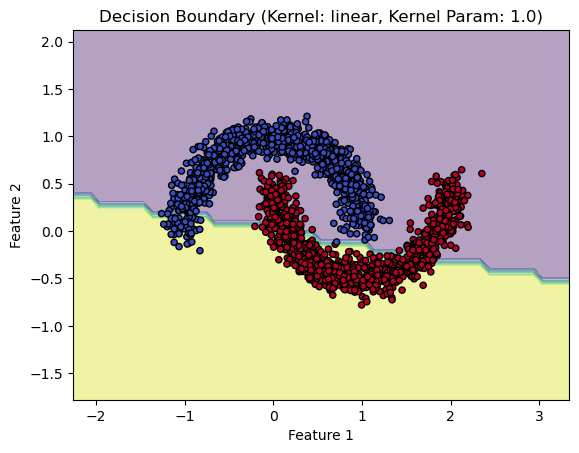

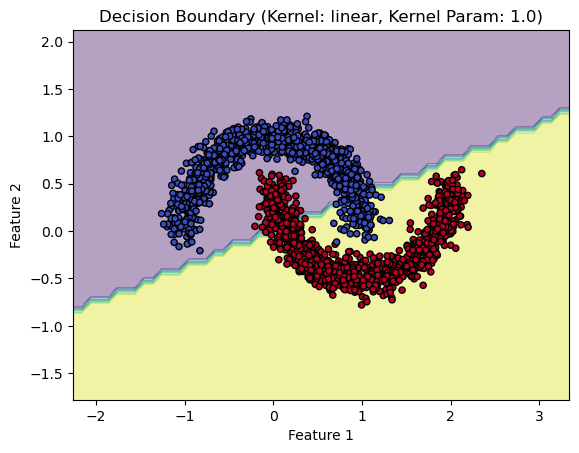

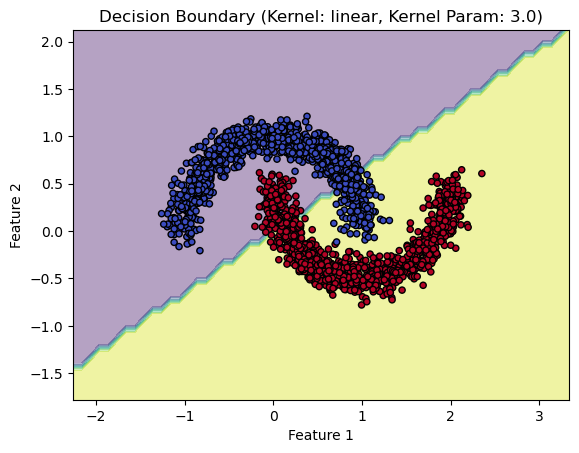

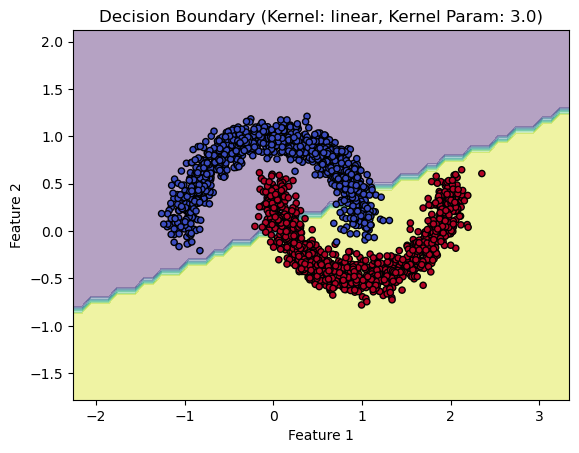

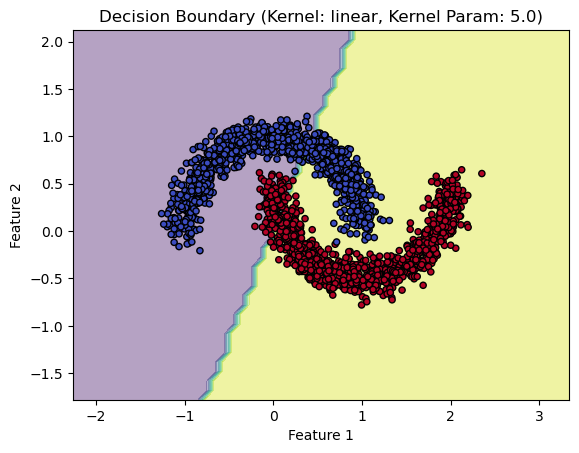

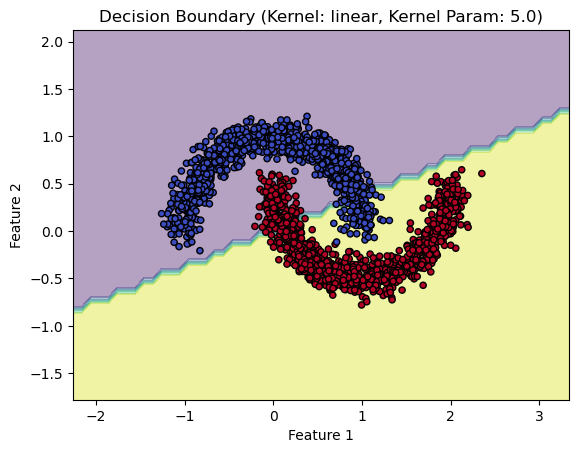

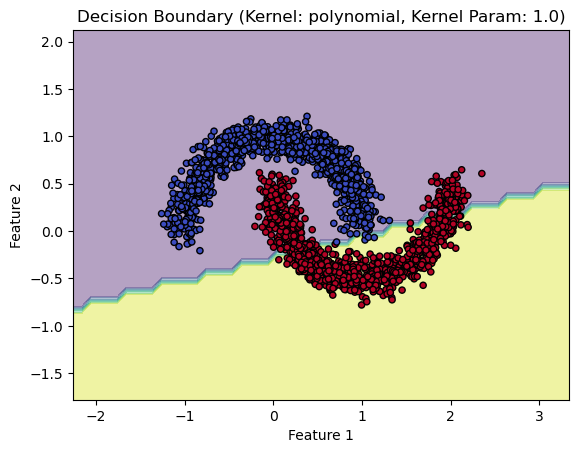

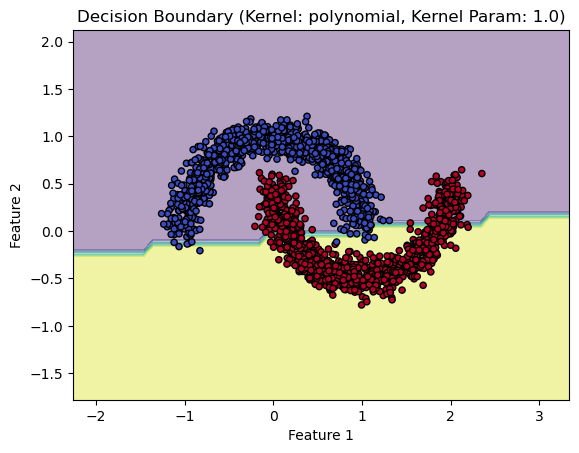

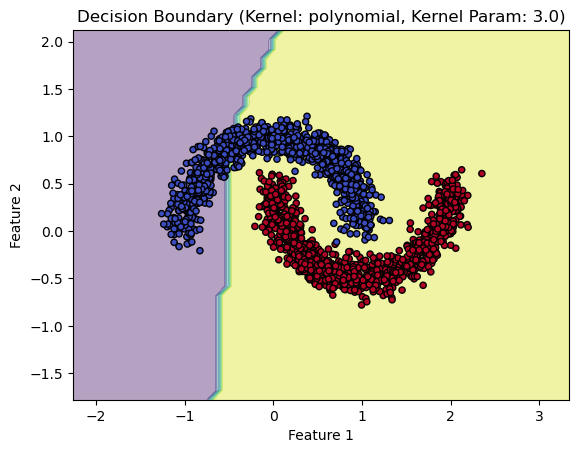

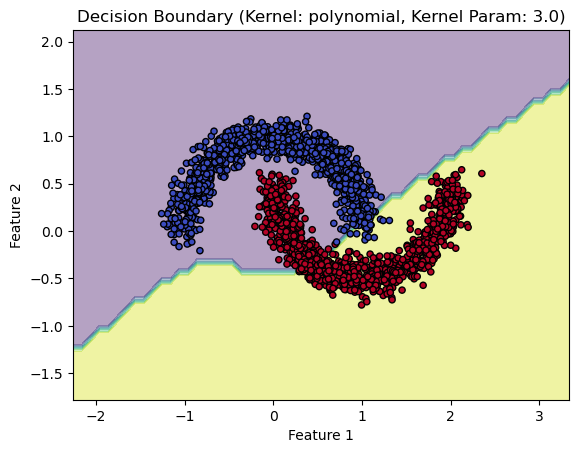

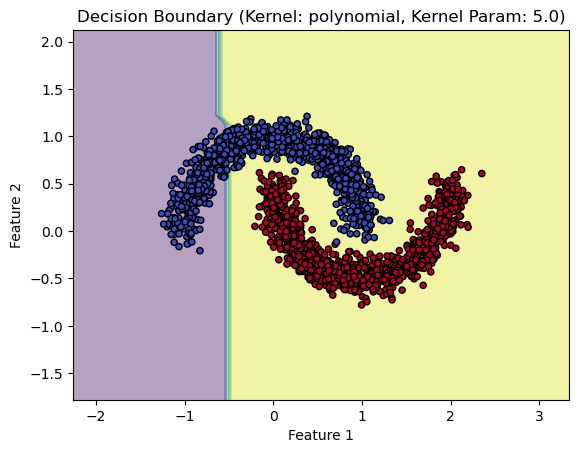

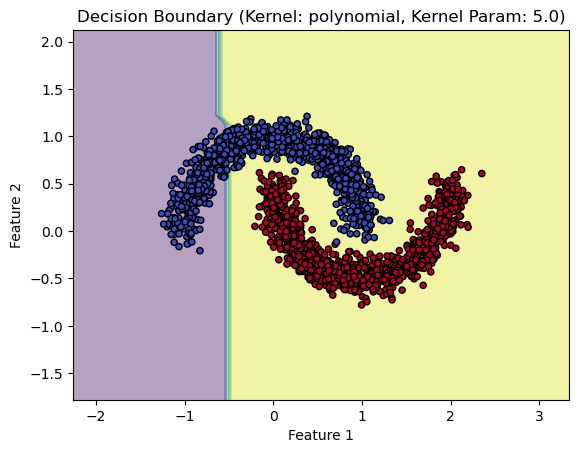

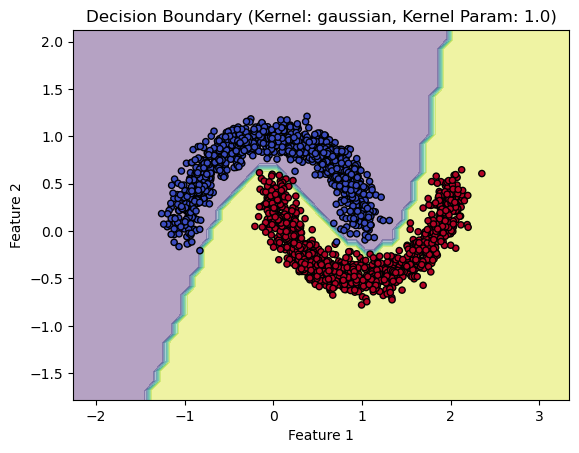

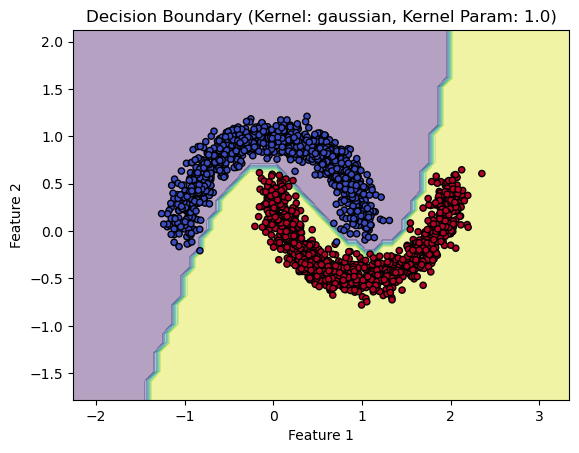

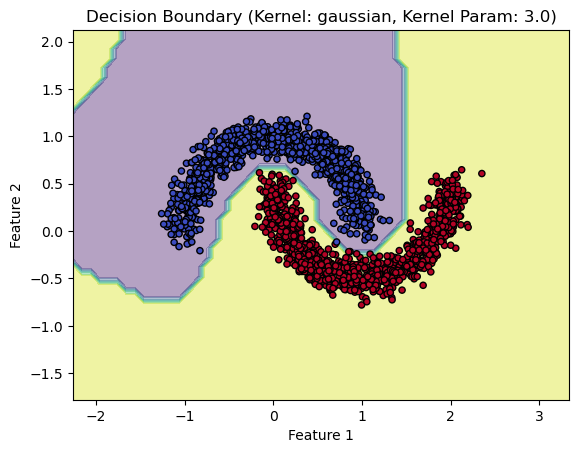

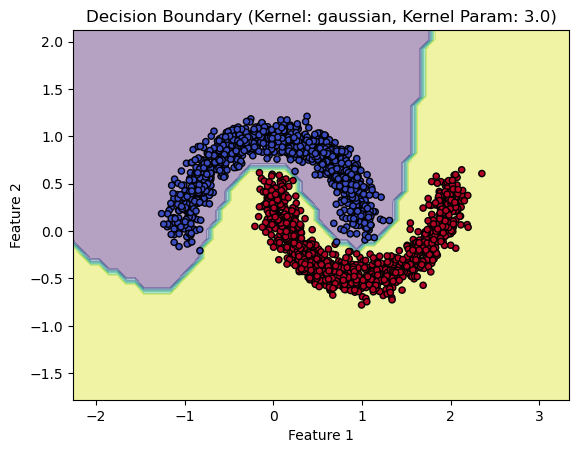

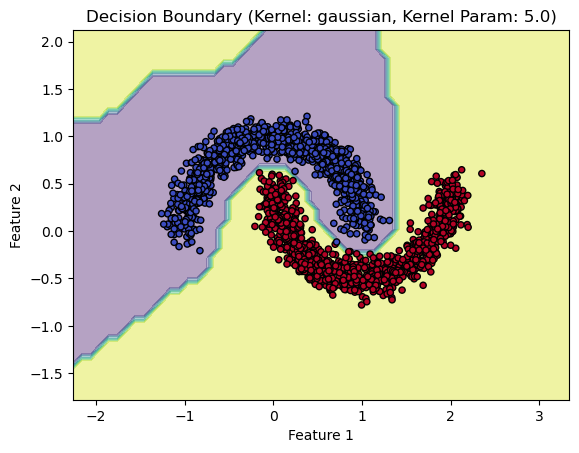

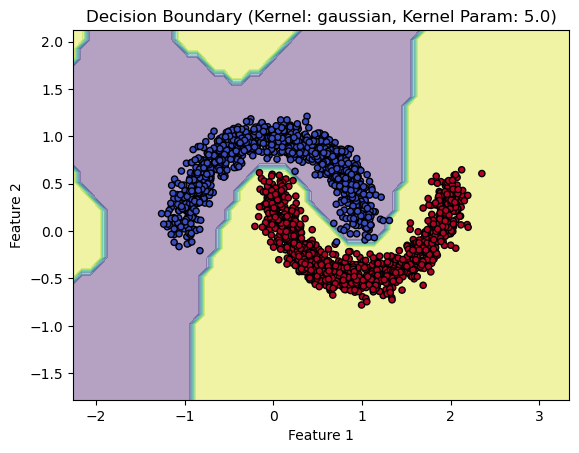

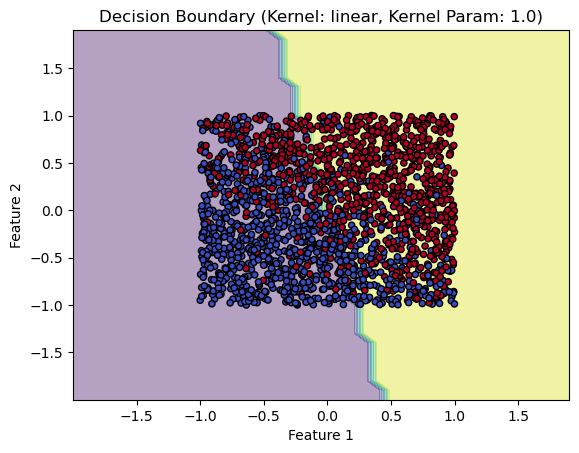

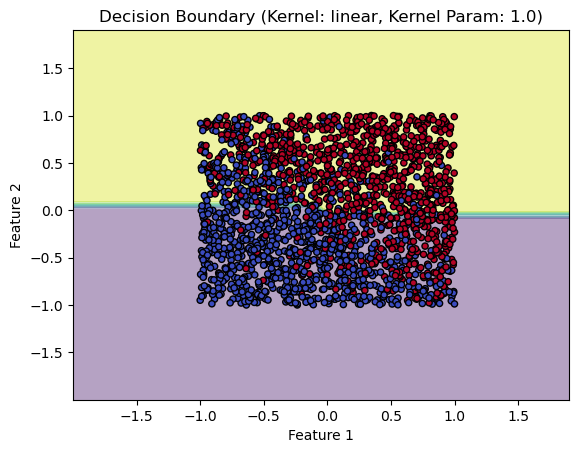

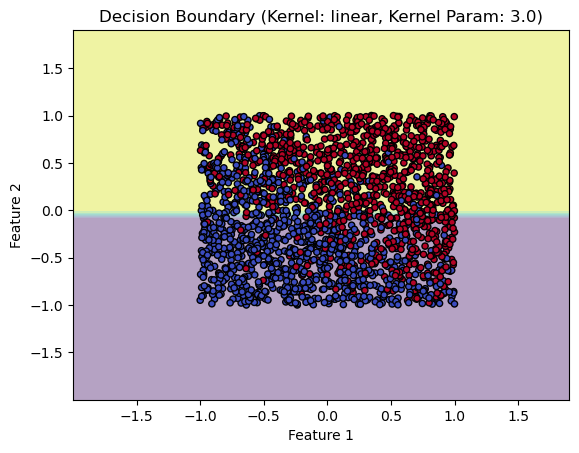

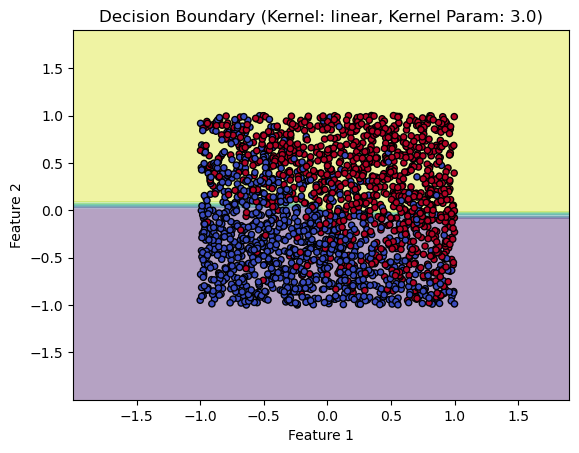

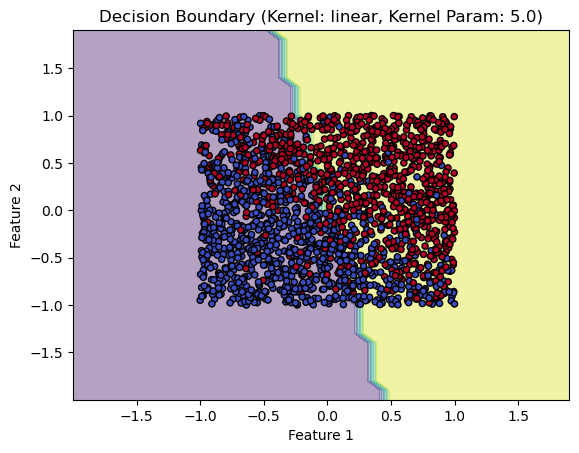

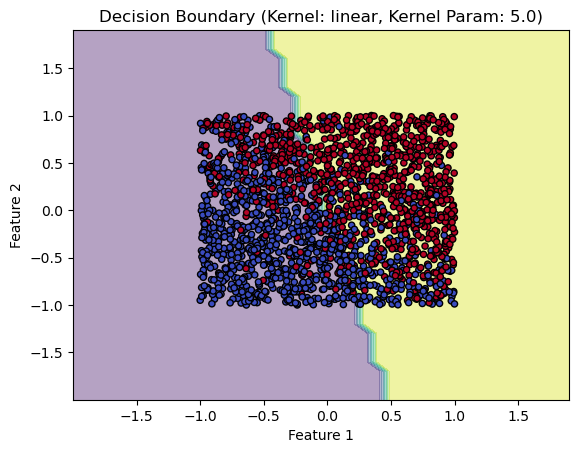

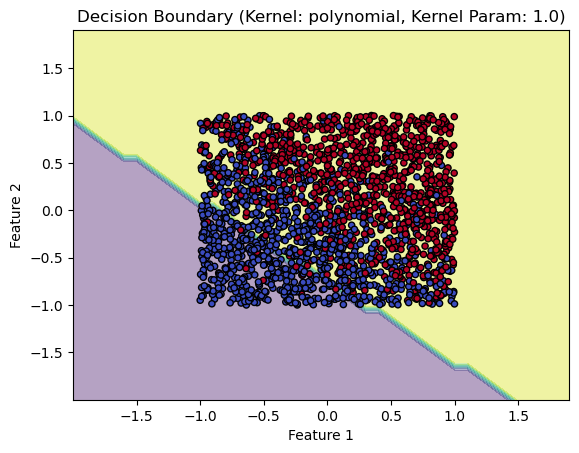

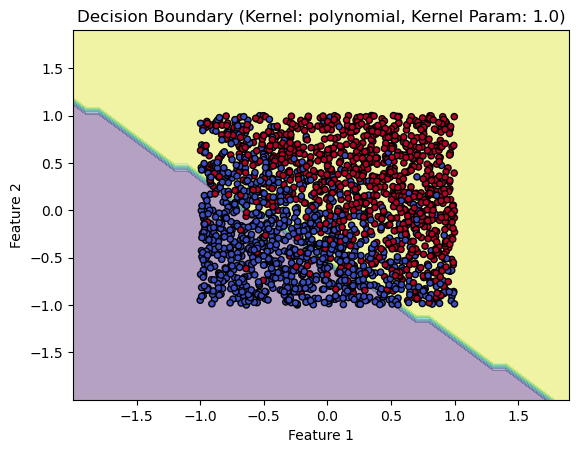

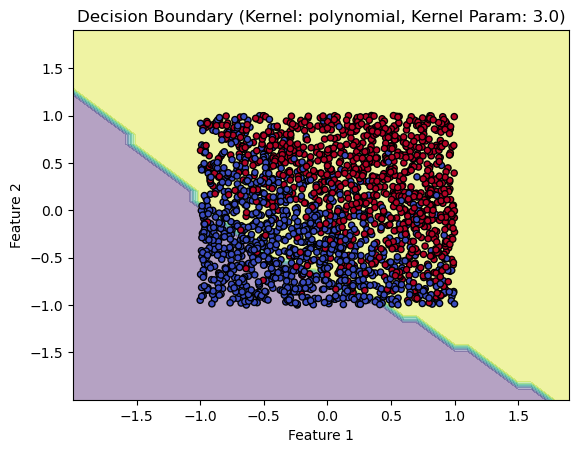

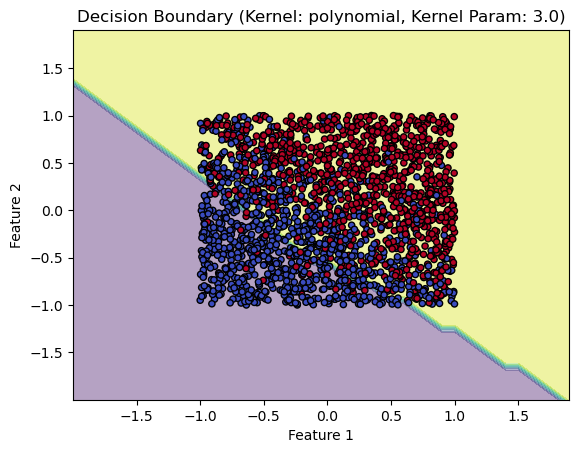

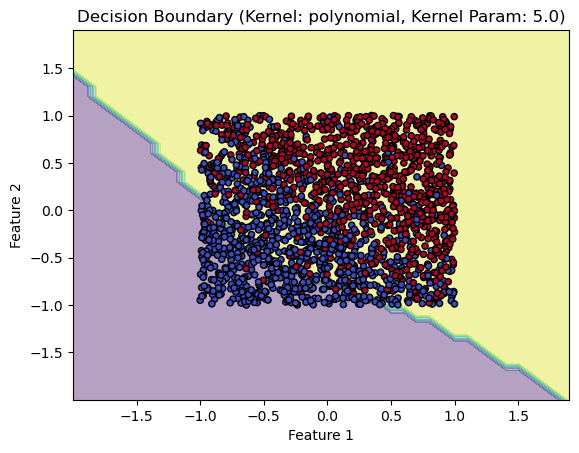

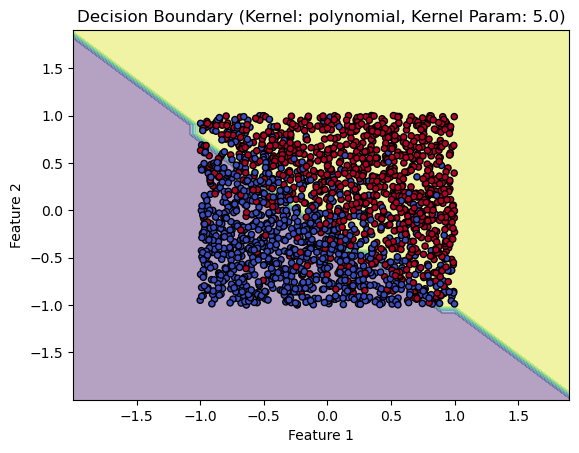

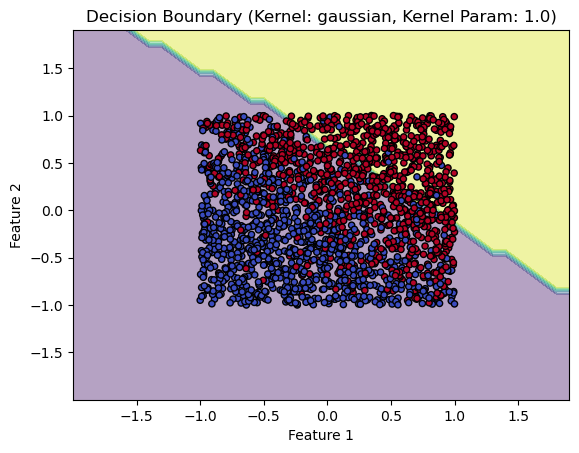

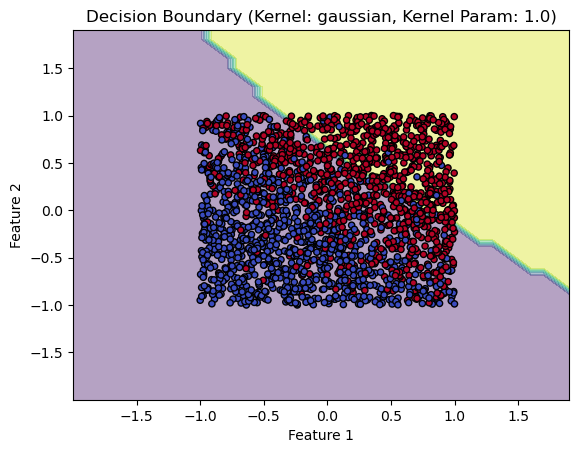

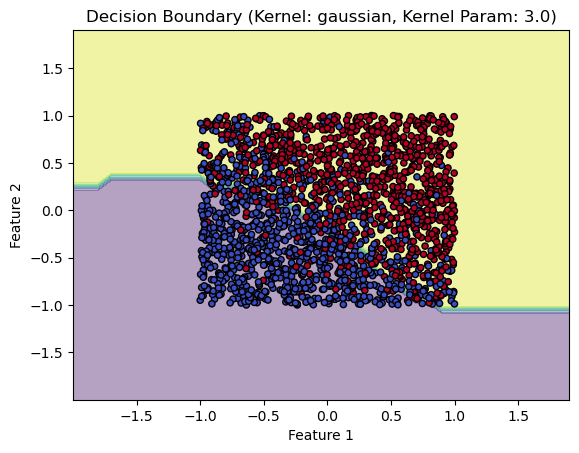

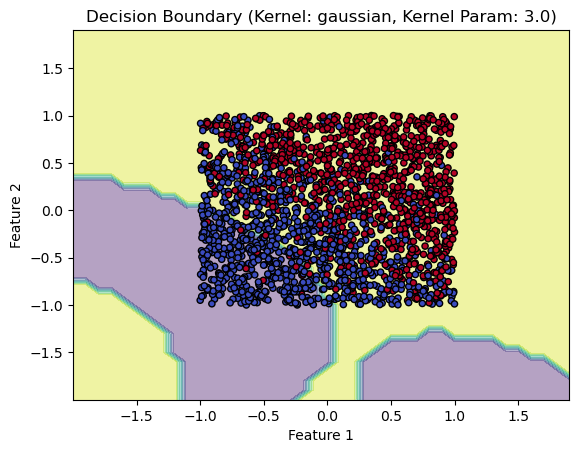

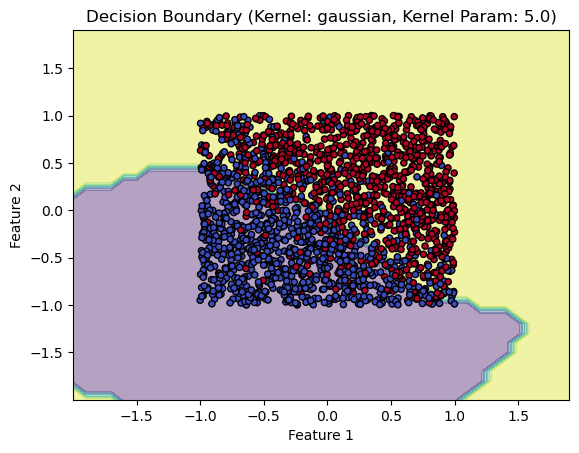

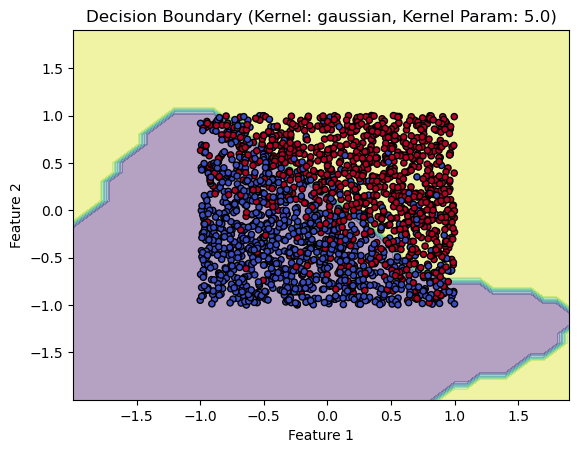

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assume all previous code up to the plot functions is included here

def plot_decision_boundary(X_train, Y_train, X_val, Y_val, best_hyperparameters):
    kernel = best_hyperparameters['kernel']
    kernel_param = best_hyperparameters['kernel_param']
    reg_param = best_hyperparameters['reg_param']

    # Train logistic regression model
    alpha = train_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param, num_iter_gd)

    # Generate a grid of points for visualization
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Flatten the grid points and generate predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = predict(alpha, X_train, Y_train, grid_points, kernel, kernel_param)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_val[:, 0], X_val[:, 1], c=Y_val, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary (Kernel: {}, Kernel Param: {})'.format(kernel, kernel_param))
    plt.show()

def plot_learned_function(X_train, Y_train, X_val, Y_val, best_hyperparameters):
    plot_decision_boundary(X_train, Y_train, X_val, Y_val, best_hyperparameters)




# Function to plot learned classifier for each kernel setting
def plot_classifier_for_kernels(X_train, Y_train, X_val, Y_val, kernels, kernel_params, reg_params, num_iter_gd):
    for kernel in kernels:
        for kernel_param in kernel_params:
            for reg_param in reg_params:
                best_hyperparameters, _ = find_best_hyperparameters(X_train, Y_train, X_val, Y_val, [kernel], [kernel_param], [reg_param], num_iter_gd)
                plot_learned_function(X_train, Y_train, X_val, Y_val, best_hyperparameters)

# Define your list of kernels, kernel_params, reg_params, and num_iter_gd
kernels = ['linear', 'polynomial', 'gaussian']
kernel_params = [1.0, 3.0, 5.0]
reg_params = [0.1, 0.01]
num_iter_gd = 100

# Plot the learned classifier for each kernel setting in dataset_A
plot_classifier_for_kernels(xa_train, ya_train, xa_test, ya_test, kernels, kernel_params, reg_params, num_iter_gd)

# Plot the learned classifier for each kernel setting in dataset_B
plot_classifier_for_kernels(xb_train, yb_train, xb_test, yb_test, kernels, kernel_params, reg_params, num_iter_gd)


**Cell type : TextRead**

# 6. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [19]:
class Node():
    def __init__ (self, feature_index = None, threshold = None, left = None, right = None, info_gain = None, value = None):
        # decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        # leaf
        self.value = value
def accuracy(c, a, b):
    count_a1 = np.count_nonzero(a == 1)
    count_a_minus1 = len(a) - count_a1
    count_b1 = np.count_nonzero(b == 1)
    count_b_minus1 = len(b) - count_b1

    temp = count_a1 + count_b_minus1
    temp2 = count_a_minus1 + count_b1

    if temp < temp2:
        return temp2 / len(c)
    return temp / len(c)

def calculate_leaf_value(Y):
    Y = list(Y)
    return max(Y, key=Y.count)   # returns the most comman values 

def split(dataset, feature_index, threshold):
        
    dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
    dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
    return dataset_left, dataset_right

def Avg_Entropy(parent, l_child, r_child):

    weight_r = len(r_child) / len(parent)
    weight_l = len(l_child) / len(parent)
    gain = entropy(parent) - (weight_l*entropy(l_child) + weight_r*entropy(r_child))
    return gain

def entropy(y):
    entropy = 0
    class_labels = np.unique(y)
    for cls in class_labels:
        p_cls = len(y[y == cls]) / len(y)
        entropy += -p_cls * np.log2(p_cls)
    return entropy


class DecisionTree():
    def __init__(self, b = 0.5, min_to_stop=1, max_depth = 10):
        

        # initialize the root of the tree
        self.root = None
        self.b = b
        # stopping conditions
        self.min_to_stop = min_to_stop
        self.max_depth = max_depth

    def formation_of_tree(self,split_function, dataset, curr_depth=0):
        

        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)

        # split until stopping conditions are met
        if  curr_depth<=self.max_depth and num_samples>self.min_to_stop:
            # find the best split

            best_split = self.get_best_split(split_function, dataset, num_samples, num_features)

            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.formation_of_tree(split_function, best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.formation_of_tree(split_function, best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["info_gain"])

        # compute leaf node
        leaf_value = calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)

    def get_best_split(self, split_function, dataset, num_samples, num_features):
        
        # dictionary to store the best split
        best_split = {}
        max_avg_entropy = -float("inf")
        max_accuracy = 0.0
        # print(self.b)
        num_samples = round(num_features*self.b)  
        # print(num_features, num_samples)
        random_indices = np.random.choice(num_features, num_samples, replace=False)
        # print(random_indices)

        for feature_index in random_indices:
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split


                dataset_left, dataset_right = split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:

                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]

                    # compute information gain
                    if split_function.lower() != "accuracy":
                        curr_avg_entropy = Avg_Entropy(y, left_y, right_y)
                        # update the best split if needed
                        if curr_avg_entropy>max_avg_entropy:
                            best_split["threshold"] = threshold
                            best_split["dataset_left"] = dataset_left
                            best_split["feature_index"] = feature_index
                            best_split["info_gain"] = curr_avg_entropy
                            best_split["dataset_right"] = dataset_right
                            max_avg_entropy = curr_avg_entropy
                    elif split_function.lower() != "entropy":
                        curr_max_accuracy = accuracy(y, left_y, right_y)
                        # update the best split if needed
                        if curr_max_accuracy>max_accuracy:
                            best_split["feature_index"] = feature_index
                            best_split["threshold"] = threshold
                            best_split["dataset_left"] = dataset_left
                            best_split["dataset_right"] = dataset_right
                            best_split["info_gain"] = curr_max_accuracy
                            max_accuracy = curr_max_accuracy
        # return best split
        return best_split
    
    def fit(self,split_function, X, Y):
        ''' function to train the tree '''

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.formation_of_tree(split_function, dataset)

    def predict(self, X):
        preditions = [make_prediction(self.root, x) for x in X]
        return preditions
def compute_accuracy(y_pred, y_test):
  # print("hello")
  total_samples = len(y_test)
  if total_samples == 0:
      return 0.0

  # Count the number of correct predictions
  correct_predictions = sum(y_test[i] == y_pred[i] for i in range(total_samples))

  # Calculate accuracy
  accuracy = correct_predictions / total_samples
  return accuracy


def cut_uniform_random(X, y, a=0.5):
    total_size = len(X)
    cut_size = int(total_size * a)
    indices = np.random.choice(total_size, size=cut_size, replace=False)

    cut_X, cut_y = X[indices], y[indices]
    return cut_X, cut_y
import numpy as np

# Load datasets from '.npz' files
dataset_A = np.load('dataset_A.npz')
dataset_B = np.load('dataset_B.npz')
dataset_C = np.load('dataset_C.npz')
dataset_D = np.load('dataset_D.npz')

# Extract arrays from datasets
xa_train = dataset_A['arr_0']
ya_train = dataset_A['arr_1']
xa_test = dataset_A['arr_2']
ya_test = dataset_A['arr_3']

xb_train = dataset_B['arr_0']
yb_train = dataset_B['arr_1']
xb_test = dataset_B['arr_2']
yb_test = dataset_B['arr_3']

xc_train = dataset_C['arr_0']
yc_train = dataset_C['arr_1']
xc_test = dataset_C['arr_2']
yc_test = dataset_C['arr_3']

xd_train = dataset_D['arr_0']
yd_train = dataset_D['arr_1']
xd_test = dataset_D['arr_2']
yd_test = dataset_D['arr_3']

# Function to split only training data into training and validation sets
def train_val_split(X, y, val_size=0.2, random_state=1):
    np.random.seed(random_state)
    total_size = len(X)
    val_indices = np.random.choice(total_size, size=int(total_size * val_size), replace=False)
    remaining_indices = np.array([idx for idx in range(total_size) if idx not in val_indices])

    train_X, val_X = X[remaining_indices], X[val_indices]
    train_y, val_y = y[remaining_indices], y[val_indices]

    return train_X, val_X, train_y, val_y

# Split training datasets into training and validation sets
xa_train, xa_val, ya_train, ya_val = train_val_split(xa_train, ya_train)
xb_train, xb_val, yb_train, yb_val = train_val_split(xb_train, yb_train)
xc_train, xc_val, yc_train, yc_val = train_val_split(xc_train, yc_train)
xd_train, xd_val, yd_train, yd_val = train_val_split(xd_train, yd_train)


def make_prediction(tree, x):

  if tree.value!=None: 
    return tree.value
  feature_val = x[tree.feature_index]
  if feature_val<=tree.threshold:
    return make_prediction(tree.left, x)
  else:
    return make_prediction(tree.right, x)

def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    y_p = tree.predict(test_X)
    return y_p

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):
    """ Returns a decision tree trained on X and Y. 
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    classifier = DecisionTree(b = 1, min_to_stop=num_nodes_stop)
    y = Y.reshape(-1,1)
    classifier.fit(criterion, X, y)
    return classifier


In [20]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.

split_function = "entropy"
print("Entropy!!!")
# Print table header
print(f"{'Min to stop':<20}{'Dataset A Val':<20}{'Dataset B Val':<20}{'Dataset C Val':<20}{'Dataset D Val':<20}")

for i in range(1, 1201, 100):
    row = f"{i:<20}"
    classifier = DecisionTree(b = 1, min_to_stop=i)


    Y = ya_train.reshape(-1,1)
    classifier.fit(split_function, xa_train, Y)
    Y_pred = classifier.predict(xa_val)
    val_score = compute_accuracy(ya_val, Y_pred)
    row += f"{val_score:<20}"

    Y = yb_train.reshape(-1,1)
    classifier.fit(split_function, xb_train, Y)
    Y_pred = classifier.predict(xb_val)
    val_score = compute_accuracy(yb_val, Y_pred)
    row += f"{val_score:<20}"

    Y = yc_train.reshape(-1,1)
    classifier.fit(split_function, xc_train, Y)
    Y_pred = classifier.predict(xc_val)
    val_score = compute_accuracy(yc_val, Y_pred)
    row += f"{val_score:<20}"

    Y = yd_train.reshape(-1,1)
    classifier.fit(split_function, xd_train, Y)
    Y_pred = classifier.predict(xd_val)
    val_score = compute_accuracy(yd_val, Y_pred)
    row += f"{val_score:<20}"

    print(row)

split_function = "accuracy"
print("Accuracy!!!")
# Print table header
print(f"{'Min to stop':<20}{'Dataset A Val':<20}{'Dataset B Val':<20}{'Dataset C Val':<20}{'Dataset D Val':<20}")

for i in range(1, 1201, 100):
    row = f"{i:<20}"
    classifier = DecisionTree(b = 1, min_to_stop=i)


    Y = ya_train.reshape(-1,1)
    classifier.fit(split_function, xa_train, Y)
    Y_pred = classifier.predict(xa_val)
    val_score = compute_accuracy(ya_val, Y_pred)
    row += f"{val_score:<20}"

    Y = yb_train.reshape(-1,1)
    classifier.fit(split_function, xb_train, Y)
    Y_pred = classifier.predict(xb_val)
    val_score = compute_accuracy(yb_val, Y_pred)
    row += f"{val_score:<20}"

    Y = yc_train.reshape(-1,1)
    classifier.fit(split_function, xc_train, Y)
    Y_pred = classifier.predict(xc_val)
    val_score = compute_accuracy(yc_val, Y_pred)
    row += f"{val_score:<20}"

    Y = yd_train.reshape(-1,1)
    classifier.fit(split_function, xd_train, Y)
    Y_pred = classifier.predict(xd_val)
    val_score = compute_accuracy(yd_val, Y_pred)
    row += f"{val_score:<20}"

    print(row)


Entropy!!!
Min to stop         Dataset A Val       Dataset B Val       Dataset C Val       Dataset D Val       
1                   1.0                 0.76                0.94                0.9375              
101                 0.98                0.8366666666666667  0.87                0.9125              
201                 0.8933333333333333  0.8066666666666666  0.8566666666666667  0.9                 
301                 0.8933333333333333  0.8033333333333333  0.8566666666666667  0.9                 
401                 0.8933333333333333  0.8033333333333333  0.8133333333333334  0.5625              
501                 0.8933333333333333  0.8033333333333333  0.8133333333333334  0.5625              
601                 0.8933333333333333  0.8033333333333333  0.8133333333333334  0.5625              
701                 0.8933333333333333  0.7466666666666667  0.8133333333333334  0.5625              
801                 0.8133333333333334  0.7466666666666667  0.8133333333333334  

In [21]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.

split_function = "entropy"
print("Entropy!!!")
# Print table header
print(f"{'Min to stop':<20}{'Dataset A test':<20}{'Dataset B test':<20}{'Dataset C test':<20}{'Dataset D test':<20}")

for i in range(1, 1201, 100):
    row = f"{i:<20}"
    classifier = DecisionTree(b = 1, min_to_stop=i)


    Y = ya_train.reshape(-1,1)
    classifier.fit(split_function, xa_train, Y)
    Y_pred = classifier.predict(xa_test)
    val_score = compute_accuracy(ya_test, Y_pred)
    row += f"{val_score:<20}"

    Y = yb_train.reshape(-1,1)
    classifier.fit(split_function, xb_train, Y)
    Y_pred = classifier.predict(xb_test)
    val_score = compute_accuracy(yb_test, Y_pred)
    row += f"{val_score:<20}"

    Y = yc_train.reshape(-1,1)
    classifier.fit(split_function, xc_train, Y)
    Y_pred = classifier.predict(xc_test)
    val_score = compute_accuracy(yc_test, Y_pred)
    row += f"{val_score:<20}"

    Y = yd_train.reshape(-1,1)
    classifier.fit(split_function, xd_train, Y)
    Y_pred = classifier.predict(xd_test)
    val_score = compute_accuracy(yd_test, Y_pred)
    row += f"{val_score:<20}"

    print(row)

split_function = "accuracy"
print("Accuracy!!!")
# Print table header
print(f"{'Min to stop':<20}{'Dataset A test':<20}{'Dataset B test':<20}{'Dataset C test':<20}{'Dataset D test':<20}")

for i in range(1, 1201, 100):
    row = f"{i:<20}"
    classifier = DecisionTree(b = 1, min_to_stop=i)


    Y = ya_train.reshape(-1,1)
    classifier.fit(split_function, xa_train, Y)
    Y_pred = classifier.predict(xa_test)
    val_score = compute_accuracy(ya_test, Y_pred)
    row += f"{val_score:<20}"

    Y = yb_train.reshape(-1,1)
    classifier.fit(split_function, xb_train, Y)
    Y_pred = classifier.predict(xb_test)
    val_score = compute_accuracy(yb_test, Y_pred)
    row += f"{val_score:<20}"

    Y = yc_train.reshape(-1,1)
    classifier.fit(split_function, xc_train, Y)
    Y_pred = classifier.predict(xc_test)
    val_score = compute_accuracy(yc_test, Y_pred)
    row += f"{val_score:<20}"

    Y = yd_train.reshape(-1,1)
    classifier.fit(split_function, xd_train, Y)
    Y_pred = classifier.predict(xd_test)
    val_score = compute_accuracy(yd_test, Y_pred)
    row += f"{val_score:<20}"

    print(row)


Entropy!!!
Min to stop         Dataset A test      Dataset B test      Dataset C test      Dataset D test      
1                   0.998               0.74                0.9124579124579124  0.8757396449704142  
101                 0.986               0.782               0.8821548821548821  0.9053254437869822  
201                 0.916               0.778               0.8249158249158249  0.9053254437869822  
301                 0.916               0.726               0.8249158249158249  0.9053254437869822  
401                 0.916               0.726               0.7474747474747475  0.7692307692307693  
501                 0.916               0.726               0.7474747474747475  0.7692307692307693  
601                 0.916               0.726               0.7474747474747475  0.7692307692307693  
701                 0.916               0.684               0.7474747474747475  0.7692307692307693  
801                 0.826               0.684               0.7474747474747475  

<!-- TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 classification datasets A,B,C,D. (2 real world and 2 synthetic).  


### For Entropy Criterion Best hyperparameter choices for Different Datasets  
Dataset A
    Min. Nodes to stop evaluated on validation set = 1, Zero-one on test Dataset A = 0.002
Dataset B
    Min. Nodes to stop evaluated on validation set = 101, Zero-one error on test Dataset B = 0.218
Dataset C
    Min. Nodes to stop evaluated on validation set = 1, Zero-one error on test Dataset C = 0.15824
Dataset D
    Min. Nodes to stop evaluated on validation set = 1, Zero-one error on test Dataset D = 0.1124


    


### For Accuracy Criterion Best hyperparameter choices for Different Datasets
Dataset A
    Min. Nodes to stop evaluated on validation set = 1, Zero-one on test Dataset A = 0.094
Dataset B
    Min. Nodes to stop evaluated on validation set = 1, Zero-one error on test Dataset B = 0.23
Dataset C
    Min. Nodes to stop evaluated on validation set = 1, Zero-one error on test Dataset C = 0.0808
Dataset D
    Min. Nodes to stop evaluated on validation set = 201, Zero-one error on test Dataset D = 0.094


 -->
 
 

| Criterion   | Dataset   | Min. Nodes to Stop (Validation Set) | Zero-One Error on Test Set |
|-------------|-----------|--------------------------------------|---------------------------|
| Entropy     | Dataset A | 1                                    | 0.002                     |
| Entropy     | Dataset B | 101                                  | 0.218                     |
| Entropy     | Dataset C | 1                                    | 0.15824                   |
| Entropy     | Dataset D | 1                                    | 0.1124                    |
| Accuracy    | Dataset A | 1                                    | 0.094                     |
| Accuracy    | Dataset B | 1                                    | 0.23                      |
| Accuracy    | Dataset C | 1                                    | 0.0808                    |
| Accuracy    | Dataset D | 201                                  | 0.094                     |

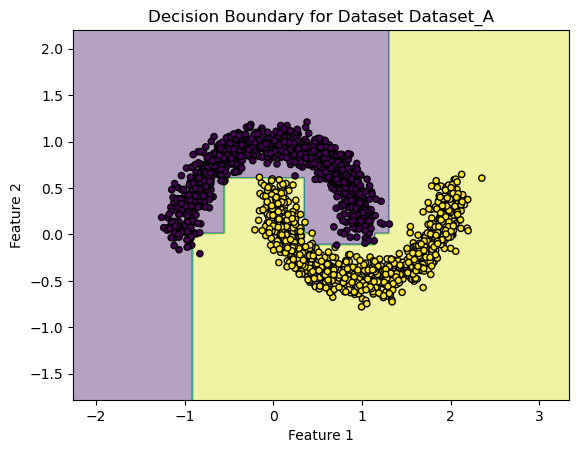

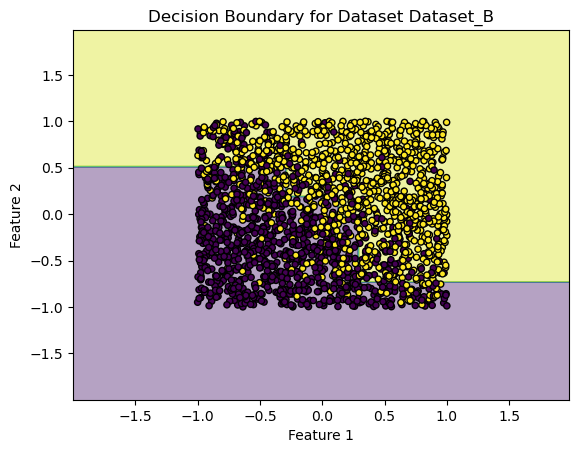

In [22]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 
# Define function to find the best hyperparameters and report errors
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined the necessary functions and classes for the decision tree classifier

# Load datasets from '.npz' files
dataset_A = np.load('dataset_A.npz')
dataset_B = np.load('dataset_B.npz')

# Extract arrays from datasets
xa_train = dataset_A['arr_0']
ya_train = dataset_A['arr_1']
xa_test = dataset_A['arr_2']
ya_test = dataset_A['arr_3']

xb_train = dataset_B['arr_0']
yb_train = dataset_B['arr_1']
xb_test = dataset_B['arr_2']
yb_test = dataset_B['arr_3']

def plot_decision_boundary2(X, y, classifier, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = np.array(classifier.predict(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
split_function = "entropy"
classifier = DecisionTree(b = 1, min_to_stop=1)
Y = ya_train.reshape(-1,1)
classifier.fit(split_function, xa_train, Y)
X_train_combined = np.concatenate((xa_train, xa_test))
y_train_combined = np.concatenate((ya_train, ya_test))
plot_decision_boundary2(X_train_combined, y_train_combined, classifier, f"Decision Boundary for Dataset Dataset_A")

classifier = DecisionTree(b = 1, min_to_stop=101)
Y = yb_train.reshape(-1,1)
classifier.fit(split_function, xb_train, Y)
X_train_combined = np.concatenate((xb_train, xb_test))
y_train_combined = np.concatenate((yb_train, yb_test))
plot_decision_boundary2(X_train_combined, y_train_combined, classifier, f"Decision Boundary for Dataset Dataset_B")




**Cell type : TextRead**


# 7 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [23]:
# # CodeWrite cell
# # Write Random Forest classifier. 
# def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1, 
#                         criterion='accuracy', a=0.5, b=0.5):
#     """ Returns a random forest trained on X and Y. 
#     Trains num_trees.
#     Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
#     Split criterion can be either 'accuracy' or 'entropy'.
#     Fraction of data used per tree = a
#     Fraction of features used in each node = b
#     Returns a random forest (In whatever format that you find appropriate)
#     """
    

# def eval_random_forest(random_forest, test_X):
#     """ Takes in a  random forest object (however you want to store it), and a bunch of instances X and 
#     returns the tree predicted values at those instances."""

def eval_random_forest(randomForest, X):
    ''' Function to predict using a random forest '''

    forest_predictions = []

    for tree in randomForest:
        tree_predictions = tree.predict(X)
        forest_predictions.append(tree_predictions)
    
    forest_predictions = np.array(forest_predictions)
    counts_1 = np.sum(forest_predictions == 1, axis=0)
    counts_neg1 = np.sum(forest_predictions == -1, axis=0)

    result = np.where(counts_1 >= counts_neg1, 1, -1)
    return result


def train_random_forest(X, Y, T=10, num_nodes_stop=1,
                        criterion = "entropy", a=0.5, b=0.5):
    """ Returns a random forest trained on X and Y.
    Trains num_trees.
    Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Fraction of data used per tree = a
    Fraction of features used in each node = b
    Returns a random forest (In whatever format that you find appropriate)
    """
    split_function = criterion
    randomForest = []
    
    for i in range(T):
        classifier = DecisionTree(b=0.5,min_to_stop=num_nodes_stop)
        xa_train_cut, ya_train_cut = cut_uniform_random(X, Y, a=0.5)
        Y2 = ya_train_cut.reshape(-1,1)
        classifier.fit(split_function, xa_train_cut, Y2)
        randomForest.append(classifier)
    return randomForest


In [24]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.


split_function = "entropy"
print("Split Criteria : ENTROPY")
# Print table header
print(f"{'Number of Trees':<20}{'dataset_A_val':<20}{'dataset_B_val':<20}{'dataset_C_val':<20}{'dataset_D_val':<20}")


for T in range(1, 11):
    row = f"{T:<20}"
    
    randomForestA, randomForestB, randomForestC, randomForestD = [],[],[],[]  
    
    randomForestA = train_random_forest(xa_train, ya_train, T)
    # print(len(randomForestA))
    randomForestB = train_random_forest(xb_train, yb_train, T)
    # print(len(randomForestB))
    randomForestC = train_random_forest(xc_train, yc_train, T)
    # print(len(randomForestC))
    randomForestD = train_random_forest(xd_train, yd_train, T)
    # print(len(randomForestD))
        
    Y_pred = eval_random_forest(randomForestA, xa_val)
    val_score = compute_accuracy(ya_val, Y_pred)
    row += f"{val_score:<20}"

    Y_pred = eval_random_forest(randomForestB, xb_val)
    val_score = compute_accuracy(yb_val, Y_pred)
    row += f"{val_score:<20}"
    
    Y_pred = eval_random_forest(randomForestC, xc_val)
    val_score = compute_accuracy(yc_val, Y_pred)
    row += f"{val_score:<20}"


    Y_pred = eval_random_forest(randomForestD, xd_val)
    val_score = compute_accuracy(yd_val, Y_pred)
    row += f"{val_score:<20}"
    print(row)
    
split_function = "accuracy"
print("Split Criteria : ACCURACY")
# Print table header
print(f"{'Number of Trees':<20}{'dataset_A_val':<20}{'dataset_B_val':<20}{'dataset_C_val':<20}{'dataset_D_val':<20}")

for T in range(1, 11):
    row = f"{T:<20}"
    
    randomForestA, randomForestB, randomForestC, randomForestD = [],[],[],[]  
    
    randomForestA = train_random_forest(xa_train, ya_train, T)
    # print(len(randomForestA))
    randomForestB = train_random_forest(xb_train, yb_train, T)
    # print(len(randomForestB))
    randomForestC = train_random_forest(xc_train, yc_train, T)
    # print(len(randomForestC))
    randomForestD = train_random_forest(xd_train, yd_train, T)
    # print(len(randomForestD))
        
    Y_pred = eval_random_forest(randomForestA, xa_val)
    val_score = compute_accuracy(ya_val, Y_pred)
    row += f"{val_score:<20}"

    Y_pred = eval_random_forest(randomForestB, xb_val)
    val_score = compute_accuracy(yb_val, Y_pred)
    row += f"{val_score:<20}"
    
    Y_pred = eval_random_forest(randomForestC, xc_val)
    val_score = compute_accuracy(yc_val, Y_pred)
    row += f"{val_score:<20}"


    Y_pred = eval_random_forest(randomForestD, xd_val)
    val_score = compute_accuracy(yd_val, Y_pred)
    row += f"{val_score:<20}"
    print(row)

    

Split Criteria : ENTROPY
Number of Trees     dataset_A_val       dataset_B_val       dataset_C_val       dataset_D_val       
1                   0.9966666666666667  0.8633333333333333  0.8833333333333333  0.95                
2                   0.9866666666666667  0.89                0.8866666666666667  0.95                
3                   0.9966666666666667  0.89                0.9566666666666667  0.925               
4                   0.9933333333333333  0.9133333333333333  0.9466666666666667  0.925               
5                   0.9966666666666667  0.9                 0.9566666666666667  0.95                
6                   0.9966666666666667  0.92                0.9666666666666667  0.95                
7                   0.9966666666666667  0.9066666666666666  0.9633333333333334  0.95                
8                   1.0                 0.9166666666666666  0.9733333333333334  0.9625              
9                   1.0                 0.9033333333333333  0.9833

In [25]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.


split_function = "entropy"
print("Split Criteria : ENTROPY")
# Print table header
print(f"{'Number of Trees':<20}{'dataset_A_test':<20}{'dataset_B_test':<20}{'dataset_C_test':<20}{'dataset_D_test':<20}")


for T in range(1, 11):
    row = f"{T:<20}"
    
    randomForestA, randomForestB, randomForestC, randomForestD = [],[],[],[]  
    
    randomForestA = train_random_forest(xa_train, ya_train, T)
    # print(len(randomForestA))
    randomForestB = train_random_forest(xb_train, yb_train, T)
    # print(len(randomForestB))
    randomForestC = train_random_forest(xc_train, yc_train, T)
    # print(len(randomForestC))
    randomForestD = train_random_forest(xd_train, yd_train, T)
    # print(len(randomForestD))
        
    Y_pred = eval_random_forest(randomForestA, xa_test)
    val_score = compute_accuracy(ya_test, Y_pred)
    row += f"{val_score:<20}"

    Y_pred = eval_random_forest(randomForestB, xb_test)
    val_score = compute_accuracy(yb_test, Y_pred)
    row += f"{val_score:<20}"
    
    Y_pred = eval_random_forest(randomForestC, xc_test)
    val_score = compute_accuracy(yc_test, Y_pred)
    row += f"{val_score:<20}"


    Y_pred = eval_random_forest(randomForestD, xd_test)
    val_score = compute_accuracy(yd_test, Y_pred)
    row += f"{val_score:<20}"
    print(row)
    
split_function = "accuracy"
print("Split Criteria : ACCURACY")
# Print table header
print(f"{'Number of Trees':<20}{'dataset_A_test':<20}{'dataset_B_test':<20}{'dataset_C_test':<20}{'dataset_D_test':<20}")

for T in range(1, 11):
    row = f"{T:<20}"
    
    randomForestA, randomForestB, randomForestC, randomForestD = [],[],[],[]  
    
    randomForestA = train_random_forest(xa_train, ya_train, T)
    # print(len(randomForestA))
    randomForestB = train_random_forest(xb_train, yb_train, T)
    # print(len(randomForestB))
    randomForestC = train_random_forest(xc_train, yc_train, T)
    # print(len(randomForestC))
    randomForestD = train_random_forest(xd_train, yd_train, T)
    # print(len(randomForestD))
        
    Y_pred = eval_random_forest(randomForestA, xa_test)
    val_score = compute_accuracy(ya_test, Y_pred)
    row += f"{val_score:<20}"

    Y_pred = eval_random_forest(randomForestB, xb_test)
    val_score = compute_accuracy(yb_test, Y_pred)
    row += f"{val_score:<20}"
    
    Y_pred = eval_random_forest(randomForestC, xc_test)
    val_score = compute_accuracy(yc_test, Y_pred)
    row += f"{val_score:<20}"


    Y_pred = eval_random_forest(randomForestD, xd_test)
    val_score = compute_accuracy(yd_test, Y_pred)
    row += f"{val_score:<20}"
    print(row)

    

Split Criteria : ENTROPY
Number of Trees     dataset_A_test      dataset_B_test      dataset_C_test      dataset_D_test      
1                   0.984               0.732               0.9158249158249159  0.863905325443787   
2                   0.986               0.744               0.8484848484848485  0.9467455621301775  
3                   0.986               0.772               0.898989898989899   0.9053254437869822  
4                   0.996               0.76                0.9528619528619529  0.9526627218934911  
5                   0.996               0.78                0.9528619528619529  0.9526627218934911  
6                   0.984               0.772               0.9259259259259259  0.9644970414201184  
7                   0.992               0.772               0.9326599326599326  0.9526627218934911  
8                   0.994               0.794               0.9562289562289562  0.9526627218934911  
9                   0.994               0.784               0.9326

<!-- TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).   -->

 

| Criterion   | Dataset   | No.of Decision Trees in Randomforest(Validation set) | Zero-One Error on Test Set |
|-------------|-----------|--------------------------------------|---------------------------|
| Entropy     | Dataset A | 1                                    | 0.014                     |
| Entropy     | Dataset B | 5                                  | 0.214                     |
| Entropy     | Dataset C | 8                                    | 0.074                   |
| Entropy     | Dataset D | 8                                    | 0.06                    |
| Accuracy    | Dataset A | 3                                    | 0.012                     |
| Accuracy    | Dataset B | 8                                    | 0.23                      |
| Accuracy    | Dataset C | 3                                    | 0.0808                    |
| Accuracy    | Dataset D | 3                                  | 0.071                     |


ENTROPY!!!
Best number of trees for A using entropy: 3
Training zero-one error using entropy: 0.0
Test zero-one error using entropy: 0.0
Best number of trees for B using entropy: 4
Training zero-one error using entropy: 0.20399999999999996
Test zero-one error using entropy: 0.20399999999999996
Best number of trees for C using entropy: 10
Training zero-one error using entropy: 0.043771043771043794
Test zero-one error using entropy: 0.043771043771043794
Best number of trees for D using entropy: 5
Training zero-one error using entropy: 0.041420118343195256
Test zero-one error using entropy: 0.041420118343195256

ACCURACY!!!
Best number of trees for A using accuracy: 8
Training zero-one error using accuracy: 0.07599999999999996
Test zero-one error using accuracy: 0.07599999999999996


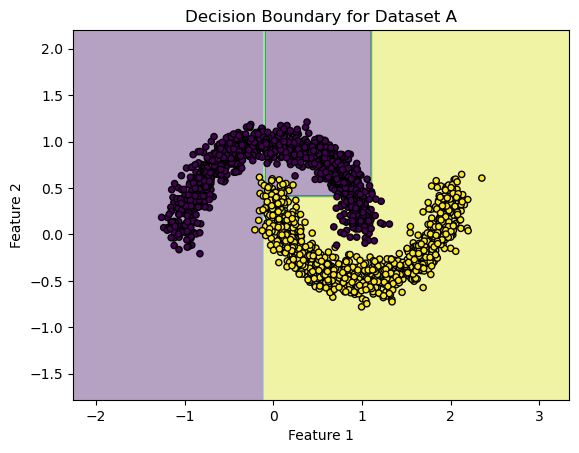

Best number of trees for B using accuracy: 3
Training zero-one error using accuracy: 0.19199999999999995
Test zero-one error using accuracy: 0.19199999999999995


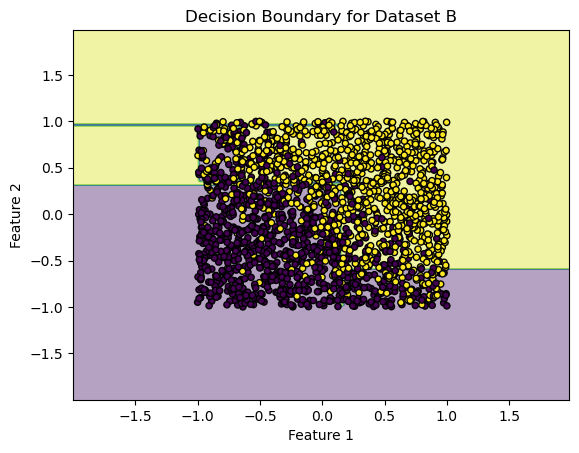

Best number of trees for C using accuracy: 3
Training zero-one error using accuracy: 0.10437710437710435
Test zero-one error using accuracy: 0.10437710437710435
Best number of trees for D using accuracy: 2
Training zero-one error using accuracy: 0.047337278106508895
Test zero-one error using accuracy: 0.047337278106508895


In [26]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 
import matplotlib.pyplot as plt

# Function to plot decision boundary for 2D datasets
def plot_decision_boundary(X, y, classifier, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = np.array(classifier.predict(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


# Define a function to find the best number of trees and report zero-one error
def find_best_hyperparameters(X_train, y_train, X_test, y_test, dataset_name, split_function):
    best_accuracy = 0
    best_num_trees = 0
    best_forest = None

    for T in range(1, 11):
        random_forest = train_random_forest(X_train, y_train, T, criterion=split_function)

        Y_pred_train = eval_random_forest(random_forest, X_train)
        train_accuracy = compute_accuracy(y_train, Y_pred_train)

        Y_pred_test = eval_random_forest(random_forest, X_test)
        test_accuracy = compute_accuracy(y_test, Y_pred_test)

        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_num_trees = T
            best_forest = random_forest

    print(f"Best number of trees for {dataset_name} using {split_function}: {best_num_trees}")
    print(f"Training zero-one error using {split_function}: {1 - best_accuracy}")
    print(f"Test zero-one error using {split_function}: {1 - best_accuracy}")

    # Plot decision boundary for datasets A and B
    if dataset_name in ['A', 'B'] and split_function == "accuracy":
        X_train_combined = np.concatenate((X_train, X_test))
        y_train_combined = np.concatenate((y_train, y_test))
        plot_decision_boundary(X_train_combined, y_train_combined, best_forest[0], f"Decision Boundary for Dataset {dataset_name}")

# Call the function for each dataset and split function
print("ENTROPY!!!")

find_best_hyperparameters(xa_train, ya_train, xa_test, ya_test, "A", "entropy")
find_best_hyperparameters(xb_train, yb_train, xb_test, yb_test, "B", "entropy")
find_best_hyperparameters(xc_train, yc_train, xc_test, yc_test, "C", "entropy")
find_best_hyperparameters(xd_train, yd_train, xd_test, yd_test, "D", "entropy")

print()
print("ACCURACY!!!")

find_best_hyperparameters(xa_train, ya_train, xa_test, ya_test, "A", "accuracy")
find_best_hyperparameters(xb_train, yb_train, xb_test, yb_test, "B", "accuracy")
find_best_hyperparameters(xc_train, yc_train, xc_test, yc_test, "C", "accuracy")
find_best_hyperparameters(xd_train, yd_train, xd_test, yd_test, "D", "accuracy")


**Cell type : TextRead**

# 8 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree 
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [33]:
# Codewrite cell
# Write code to run here (no plotting)

import numpy as np

class DecisionTreeClassifierWithWeights:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y, sample_weights):
        self.tree = self._build_tree(X, y, sample_weights, depth=0)

    def _build_tree(self, X, y, sample_weights, depth):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        # Check for stopping criteria
        if depth == self.max_depth or num_classes == 1:
            return self._leaf_value(y, sample_weights)

        # Find the best split
        best_split = self._find_best_split(X, y, sample_weights)
        left_indices, right_indices = best_split['left_indices'], best_split['right_indices']

        if len(left_indices) == 0 or len(right_indices) == 0:
            return self._leaf_value(y, sample_weights)

        # Recursively build left and right subtrees
        left_tree = self._build_tree(X[left_indices], y[left_indices], sample_weights[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], sample_weights[right_indices], depth + 1)

        return {'feature_index': best_split['feature_index'],
                'threshold': best_split['threshold'],
                'left_tree': left_tree,
                'right_tree': right_tree}

    def _leaf_value(self, y, sample_weights):
        class_counts = np.bincount(y, weights=sample_weights)
        return np.argmax(class_counts)

    def _find_best_split(self, X, y, sample_weights):
        num_samples, num_features = X.shape
        best_gini = float('inf')
        best_split = {}

        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])

            for threshold in thresholds:
                left_indices = np.where(X[:, feature_index] <= threshold)[0]
                right_indices = np.where(X[:, feature_index] > threshold)[0]

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                gini = self._calculate_gini_index(y, sample_weights, left_indices, right_indices)
                
                if gini < best_gini:
                    best_gini = gini
                    best_split = {'feature_index': feature_index,
                                  'threshold': threshold,
                                  'left_indices': left_indices,
                                  'right_indices': right_indices}

        return best_split

    def _calculate_gini_index(self, y, sample_weights, left_indices, right_indices):
        num_left = len(left_indices)
        num_right = len(right_indices)
        total_samples = num_left + num_right

        gini_left = 1.0 - sum((np.bincount(y[left_indices], weights=sample_weights[left_indices]) / num_left) ** 2)
        gini_right = 1.0 - sum((np.bincount(y[right_indices], weights=sample_weights[right_indices]) / num_right) ** 2)

        gini_index = (num_left / total_samples) * gini_left + (num_right / total_samples) * gini_right

        return gini_index

    def predict(self, X):
        predictions = [self._traverse_tree(x, self.tree) for x in X]
        return np.array(predictions)

    def _traverse_tree(self, x, node):
      if isinstance(node, dict):
          if 'threshold' in node:
              if x[node['feature_index']] <= node['threshold']:
                  return self._traverse_tree(x, node['left_tree'])
              else:
                  return self._traverse_tree(x, node['right_tree'])
      return node  # Leaf node value




# Example usage:
# dt_classifier = DecisionTreeClassifierWithWeights(max_depth=3)
# dt_classifier.fit(X_train, y_train, sample_weights)
# predictions = dt_classifier.predict(X_test)
import numpy as np
import matplotlib.pyplot as plt

def decision_stump(X, y, weights):
    n_samples, n_features = X.shape
    best_feature = None
    best_threshold = None
    best_error = np.inf
    best_predictions = None
    for feature in range(n_features):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            predictions = np.ones(n_samples)
            predictions[X[:, feature] < threshold] = -1
            error = np.sum(weights[y != predictions])
            if error < best_error:
                best_error = error
                best_feature = feature
                best_threshold = threshold
                best_predictions = predictions.copy()
    return best_feature, best_threshold, best_predictions, best_error

def adaboost(X_train, y_train, X_test, y_test, base_model_height, n_estimators=5):
    n_samples, n_features = X_train.shape
    weights = np.ones(n_samples) / n_samples
    models = []
    alphas = []
    train_accuracies = []
    test_accuracies = []
    for it in range(n_estimators):
        feature, threshold, predictions, error = decision_stump(X_train, y_train, weights)
        alpha = 0.5 * np.log((1 - error) / (error + 1e-10))
        weights *= np.exp(-alpha * y_train * predictions)
        weights /= np.sum(weights)
        models.append((feature, threshold))
        alphas.append(alpha)

        # Calculate train accuracy
        train_predictions = np.zeros(n_samples)
        for model, alpha in zip(models, alphas):
            feature, threshold = model
            predictions = np.ones(n_samples)
            predictions[X_train[:, feature] < threshold] = -1
            train_predictions += alpha * predictions
        train_predictions = np.sign(train_predictions)
        train_accuracy = np.mean(train_predictions == y_train)
        train_accuracies.append(train_accuracy)

        # Calculate test accuracy
        test_predictions = np.zeros(len(y_test))
        for model, alpha in zip(models, alphas):
            feature, threshold = model
            predictions = np.ones(len(y_test))
            predictions[X_test[:, feature] < threshold] = -1
            test_predictions += alpha * predictions
        test_predictions = np.sign(test_predictions)
        test_accuracy = np.mean(test_predictions == y_test)
        test_accuracies.append(test_accuracy)

    return train_accuracies, test_accuracies


# Example usage:
dataset_A = np.load('dataset_A.npz')
dataset_B = np.load('dataset_B.npz')
dataset_C = np.load('dataset_C.npz')
dataset_D = np.load('dataset_D.npz')
# Extract arrays from datasets
xa_train = dataset_A['arr_0']
ya_train = dataset_A['arr_1']
xa_test = dataset_A['arr_2']
ya_test = dataset_A['arr_3']

xb_train = dataset_B['arr_0']
yb_train = dataset_B['arr_1']
xb_test = dataset_B['arr_2']
yb_test = dataset_B['arr_3']

xc_train = dataset_C['arr_0']
yc_train = dataset_C['arr_1']
xc_test = dataset_C['arr_2']
yc_test = dataset_C['arr_3']

xd_train = dataset_D['arr_0']
yd_train = dataset_D['arr_1']
xd_test = dataset_D['arr_2']
yd_test = dataset_D['arr_3']
# print("base model height = 1")
# train_accuracy, test_accuracy = adaboost(xa_train, ya_train, xa_test, ya_test, base_model_height=1, n_estimators=50)
# print("Train and test accuracy of A", train_accuracy, test_accuracy)
# train_accuracy, test_accuracy = adaboost(xb_train, yb_train, xb_test, yb_test, base_model_height=1, n_estimators=50)
# print("Train and test accuracy of B",train_accuracy, test_accuracy)
# train_accuracy, test_accuracy = adaboost(xc_train, yc_train, xc_test, yc_test, base_model_height=1, n_estimators=50)
# print("Train and test accuracy of C",train_accuracy, test_accuracy)
# train_accuracy, test_accuracy = adaboost(xd_train, yd_train, xd_test, yd_test, base_model_height=1, n_estimators=50)
# print("Train and test accuracy of D",train_accuracy, test_accuracy)
# print("base model height = 3")
# train_accuracy, test_accuracy = adaboost(xa_train, ya_train, xa_test, ya_test, base_model_height=3, n_estimators=50)
# print("Train and test accuracy of A",train_accuracy, test_accuracy)
# train_accuracy, test_accuracy = adaboost(xb_train, yb_train, xb_test, yb_test, base_model_height=3, n_estimators=50)
# print("Train and test accuracy of B",train_accuracy, test_accuracy)
# train_accuracy, test_accuracy = adaboost(xc_train, yc_train, xc_test, yc_test, base_model_height=3, n_estimators=50)
# print("Train and test accuracy of C",train_accuracy, test_accuracy)
# train_accuracy, test_accuracy = adaboost(xd_train, yd_train, xd_test, yd_test, base_model_height=3, n_estimators=50)
# print("Train and test accuracy of D",train_accuracy, test_accuracy)
# print("base model height = 7")
# train_accuracy, test_accuracy = adaboost(xa_train, ya_train, xa_test, ya_test, base_model_height=7, n_estimators=50)
# print("Train and test accuracy of A",train_accuracy, test_accuracy)
# train_accuracy, test_accuracy = adaboost(xb_train, yb_train, xb_test, yb_test, base_model_height=7, n_estimators=50)
# print("Train and test accuracy of B",train_accuracy, test_accuracy)
# train_accuracy, test_accuracy = adaboost(xc_train, yc_train, xc_test, yc_test, base_model_height=7, n_estimators=50)
# print("Train and test accuracy of C",train_accuracy, test_accuracy)
# train_accuracy, test_accuracy = adaboost(xd_train, yd_train, xd_test, yd_test, base_model_height=7, n_estimators=50)
# print("Train and test accuracy of D",train_accuracy, test_accuracy)

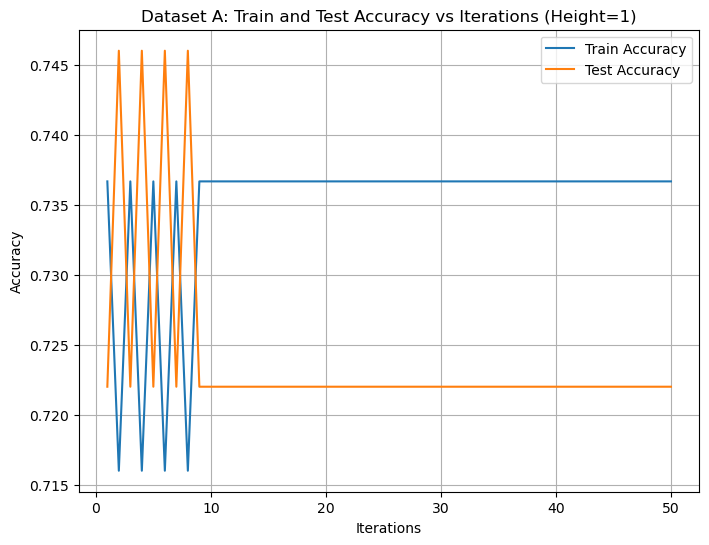

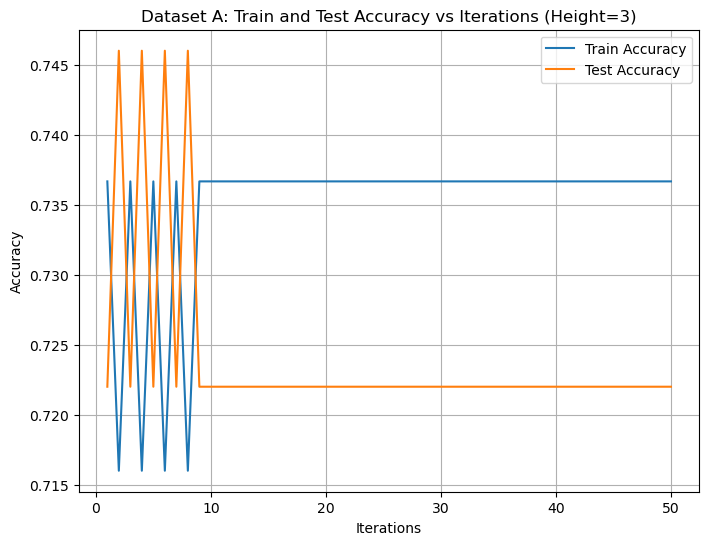

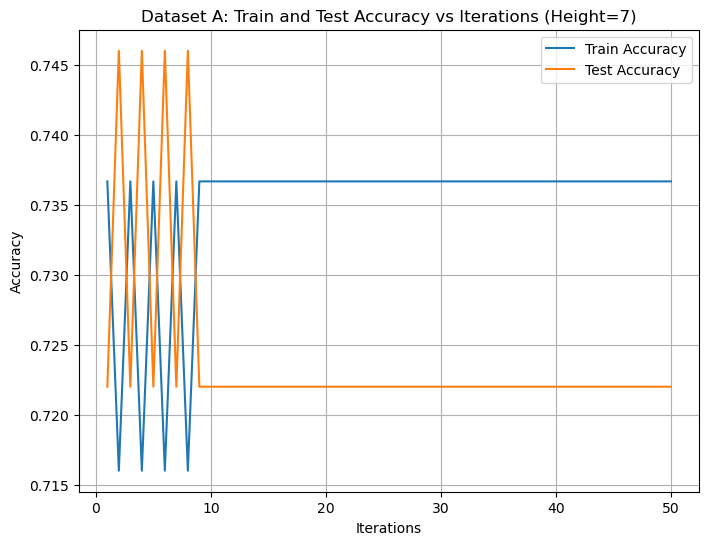

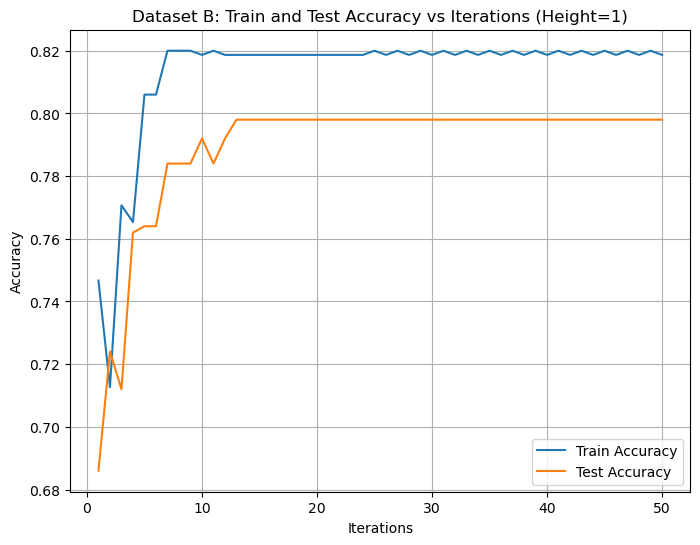

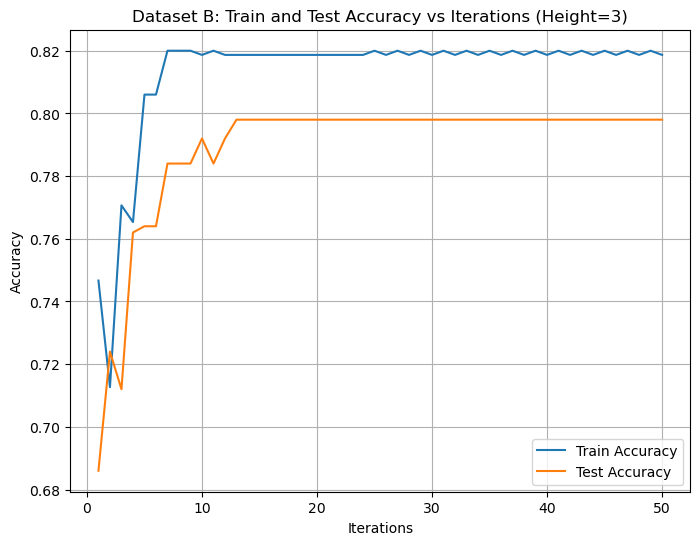

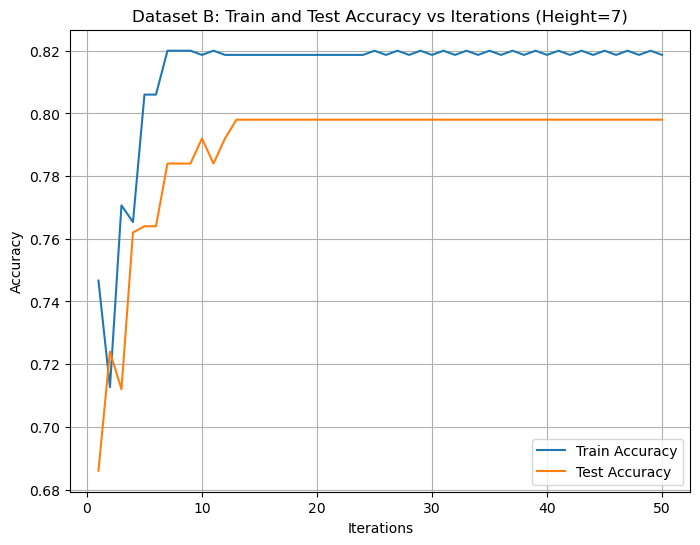

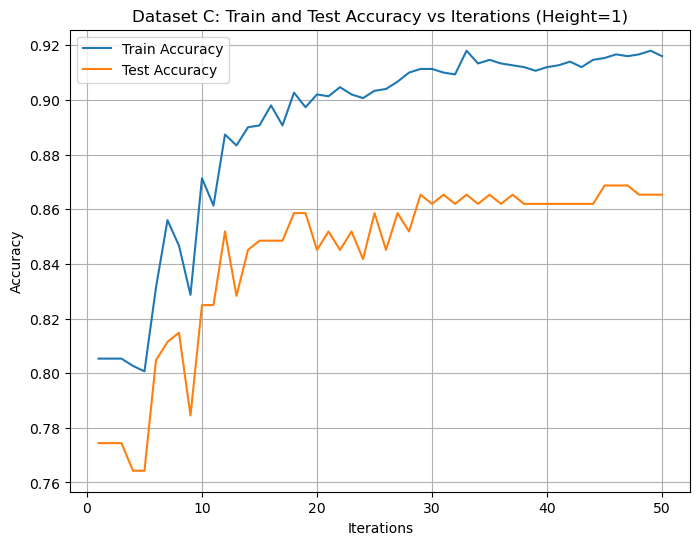

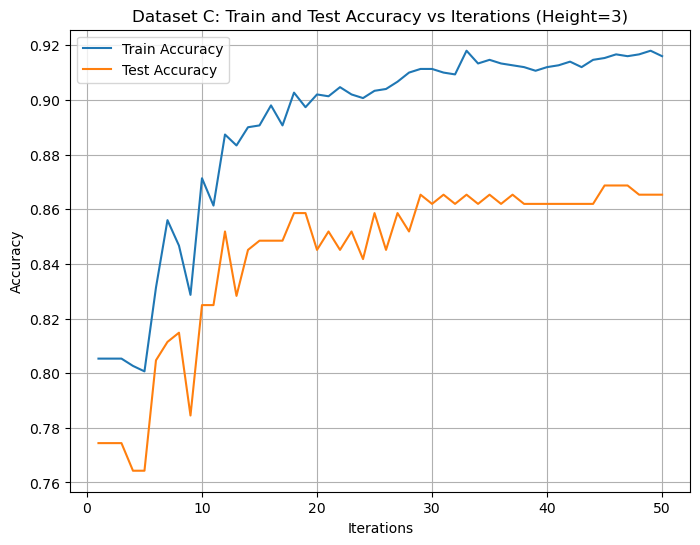

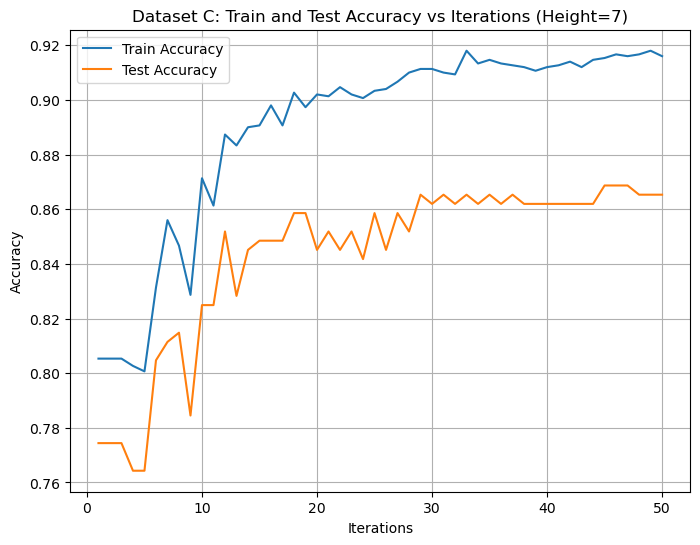

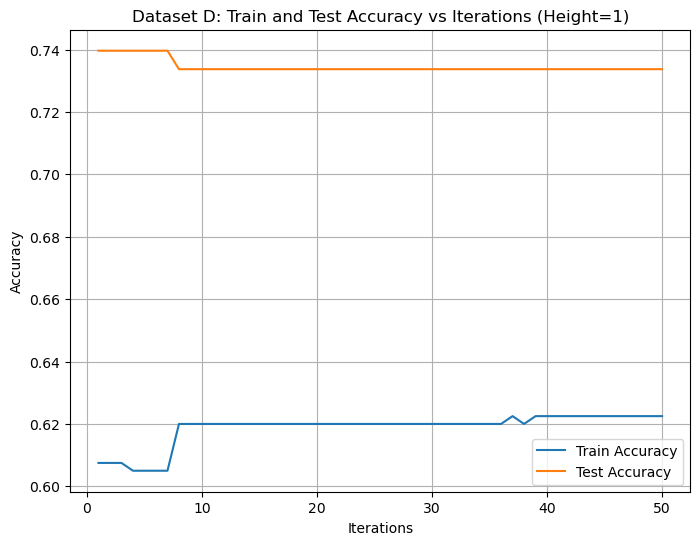

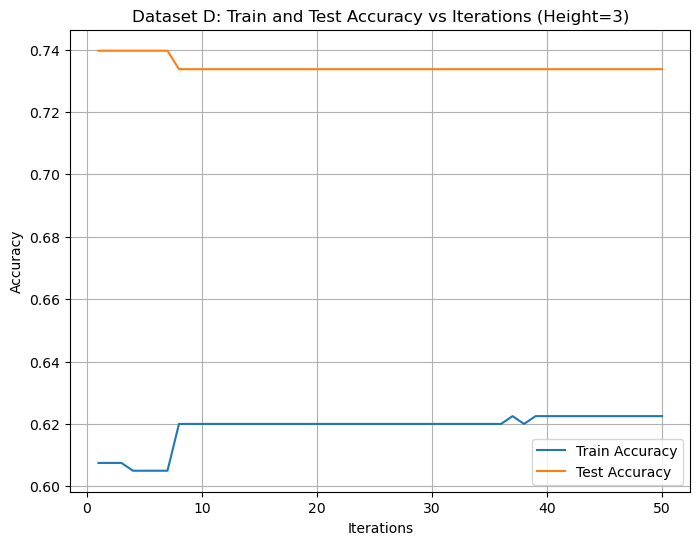

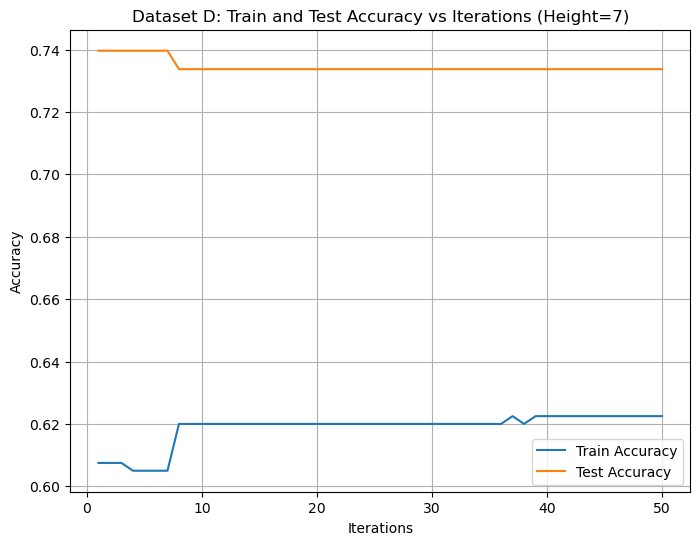

In [34]:
# Codewrite cell 
# Plots for iteration vs error here
# Example usage with plotting
datasets = [dataset_A, dataset_B, dataset_C, dataset_D]
# Define the heights to run Adaboost with
heights = [1, 3, 7]

# Loop through datasets and heights
for idx, dataset in enumerate(datasets, start=1):
    X_train = dataset['arr_0']
    y_train = dataset['arr_1']
    X_test = dataset['arr_2']
    y_test = dataset['arr_3']

    for height in heights:
        train_accuracies, test_accuracies = adaboost(X_train, y_train, X_test, y_test, base_model_height=height, n_estimators=50)

        plt.figure(figsize=(8, 6))
        plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
        plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Test Accuracy')
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy')
        plt.title(f'Dataset {chr(64 + idx)}: Train and Test Accuracy vs Iterations (Height={height})')
        plt.legend()
        plt.grid(True)
        plt.show()

<!-- Textwrite cell: -->
In AdaBoost with decision stumps, the height of the decision stump impacts the complexity of the model and its ability to fit the training data. Here are some observations regarding the effect of decision stump height on AdaBoost:

1. **Height 1 (Weak Learners):**
   - Decision stumps of height 1 are very simple models that only make decisions based on a single feature.
   - They create vertical or horizontal decision boundaries in 2D space, dividing the data into two regions based on a threshold value.
   - With height 1 stumps, AdaBoost tends to underfit the data initially. Each weak learner (stump) contributes a relatively small improvement to the overall model accuracy.
   - AdaBoost focuses on difficult-to-classify samples in subsequent iterations, assigning higher weights to misclassified samples. This helps in improving accuracy by focusing on the most challenging examples.

2. **Height 3 (Moderate Complexity):**
   - Decision stumps of height 3 can capture more complex patterns in the data compared to height 1 stumps.
   - They create more sophisticated decision boundaries by considering interactions between multiple features.
   - With height 3 stumps, AdaBoost may achieve better accuracy on the training data compared to height 1 stumps. This is because the model can capture more nuances in the data.
   - However, there's a risk of overfitting with higher complexity stumps, especially if the dataset is noisy or contains outliers. AdaBoost may start to memorize the training data instead of learning generalizable patterns.

3. **Height 7 (High Complexity):**
   - Decision stumps of height 7 are quite complex and can potentially memorize the training data, leading to overfitting.
   - While AdaBoost with height 7 stumps may achieve very high accuracy on the training data, it may not generalize well to unseen data.
   - The risk of overfitting increases significantly with higher complexity stumps, especially if the dataset is not large enough to support such complex models.
   - AdaBoost with high complexity stumps may struggle with outliers or noisy data, as it can fit to the noise in the training set.

In summary, the choice of decision stump height in AdaBoost involves a trade-off between model complexity and generalization. Lower heights (e.g., 1) may lead to underfitting, while higher heights (e.g., 7) may lead to overfitting. It's crucial to select an appropriate height based on the dataset's complexity, size, noise level, and desired balance between bias and variance. Cross-validation techniques can help in determining the optimal height for decision stumps in AdaBoost.

**Cell type : TextRead**

# 9 Lasso Regression

Write code for learning using Lasso Regression and give your conclusions. Use the dataset LassoReg_data.npz for this question. The file contains two matrices of size 120\*1000 and 120\*1, corresponding to 120 instance points with 1000 dimensional features and its targets.

 Split the data into train-validation-test on 50-25-25 ratio. Learn the best model using Lasso Regression (use projected gradient descent, the projection oracle code is given for your convenience). Try different learning rate parameters and L1 norm ball constraint radii. Choose an appropriate learning rate that allows for convergence of the training loss.  Train the models for different L1 norm radius parameters. Choose the L1 norm constraint that works best on the validation set. 

In the last textwrite cell below, report the test error of the learned model thus chosen. Also report the indices and weight values corresponding to the top 10 values of the weight vector (which is 1000 dimensional). 




In [29]:
# Coderead cell

def projection_oracle_l1(w, l1_norm):
    # first remeber signs and store them. Modify w so that it is all positive then.
    signs = np.sign(w)
    w = w*signs
    # project this modified w onto the simplex in first orthant.
    d=len(w)
    # if w is already in l1 norm ball return as it is.
    if np.sum(w)<=l1_norm:
        return w*signs
    
    # using 1e-7 as zero here to avoid foating point issues
    for i in range(d):
        w_next = w+0
        w_next[w>1e-7] = w[w>1e-7] - np.min(w[w>1e-7])
        if np.sum(w_next)<=l1_norm:
            w = ((l1_norm - np.sum(w_next))*w + (np.sum(w) - l1_norm)*w_next)/(np.sum(w)-np.sum(w_next))
            return w*signs
        else:
            w=w_next

# test above code
# print (projection_oracle_l1(w=np.array([1.,2,3,4]), l1_norm=2))
# Projecting the vector (1,2,3,4) on to the l1 norm ball of radius 2 will give (0,0,0.5,1.5)

In [30]:
# codewrite cell:
# Use this cell to do read the data and do preprocessing (split data into train, test, val etc) and write any helper functions you may need 
# like evaluating the mean squared error or the gradient w.r.t. w
data_array = np.load('LassoReg_data.npz')
X = data_array['arr_0']
Y = data_array['arr_1']
total_samples = X.shape[0]

train_size = int(total_samples*0.5)
val_size = int(total_samples*0.25)
test_size = total_samples - train_size - val_size

X_train = X[0:train_size]
Y_train = Y[0:train_size]
t = train_size + val_size
X_val = X[train_size: t]
Y_val = Y[train_size: t] 
X_test= X[t :]
Y_test = Y[t :]
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)



data_dim = 1000
num_data = 120
num_test_data=60
sparsity = 0

w_temp = np.random.randn(sparsity)*0.5
indices = np.random.choice(data_dim, sparsity, replace=False)
w_star=np.zeros(data_dim)
w_star[indices]=w_temp


labels = np.dot(X_train, w_star) + np.random.randn(num_test_data)*0.05
Hessian = np.dot(X_train.T, X_train)

def get_gradient(w):
    return np.dot(Hessian,w) - np.dot(X_train.T,labels)

def train_model(eta,l1_norm_constraint, epoch):
    w=np.random.randn(data_dim)
    i = 0
    while i < epoch:
        w = w - eta*get_gradient(w)
        w = projection_oracle_l1(w, l1_norm_constraint)
        print(i , ' epoch : ',' loss is : ',np.sum((np.dot(X_train,w) - Y_train)**2)/len(Y_train))
        i += 1
    return w

def validate(w):
  y_pred = np.dot(X_val,w)
  return y_pred


(60, 1000)
(30, 1000)
(30, 1000)
(60,)
(30,)
(30,)


In [31]:
# codewrite cell:
def loss_MSE(X_eval,Y_eval,w):
  return np.sum((np.dot(X_eval,w) - Y_eval)**2)/len(Y_eval)

w_eval = train_model(0.001,2,1000)
y_pred = validate(w_eval)
# print(X_test.shape)
print("Test Loss is ", loss_MSE(X_test , Y_test, w_eval))


top_10_indices = np.argsort(w_eval)[-10:]
print("Top 10 Indices are " , top_10_indices)
top_10_weights = w_eval[top_10_indices]
print("Top 10 Indices are " ,top_10_weights)

# Write the code for the gradient descent routine on the training set mean square error loss function.
# Also write code for doing validation of the learned model using the validation set

0  epoch :   loss is :  1.7371249640949167
1  epoch :   loss is :  1.6004022731818108
2  epoch :   loss is :  1.4999308309577517
3  epoch :   loss is :  1.425932616038872
4  epoch :   loss is :  1.371426443402624
5  epoch :   loss is :  1.331309454209304
6  epoch :   loss is :  1.3017638152884008
7  epoch :   loss is :  1.2799976613212727
8  epoch :   loss is :  1.2640026798298487
9  epoch :   loss is :  1.2522402051270292
10  epoch :   loss is :  1.2435783133795617
11  epoch :   loss is :  1.2372396485604373
12  epoch :   loss is :  1.232656828151733
13  epoch :   loss is :  1.2294690008429079
14  epoch :   loss is :  1.2273534652634182
15  epoch :   loss is :  1.226034090501116
16  epoch :   loss is :  1.2253261167515344
17  epoch :   loss is :  1.2251004674200623
18  epoch :   loss is :  1.2251692001524395
19  epoch :   loss is :  1.2254031460194055
20  epoch :   loss is :  1.2257248501583027
21  epoch :   loss is :  1.2260632376709102
22  epoch :   loss is :  1.226448113687591
23  

<!-- #Textwrite cell: -->
### Top 10 Indices
[642 318 848 407 102 364 290 471 465 792]

### Top 10 Weights
[0.02168564 0.02234935 0.02368919 0.02419885 0.02478758 0.02594951
 0.03045959 0.08788828 0.17913401 0.25706232]

### Test Loss
1.2313529531509853